![Sheertex](https://cdn.shopify.com/s/files/1/0114/4120/9408/files/Sheertex_Wordmark_RGB_Black_120x.png?v=1594252081)

# Data Analysis Challenge for Sheertex

**Sheertex**, built on a foundation of using innovation and technology to solve an everyday problem, manufactures stronger pantyhose that one can rely on. With this in mind, the data that needs to be analyzed in such a manner where insights can be pulled out to impact the company's decisions.

#### The Challenge:

The Production team would like you to use the **BTSR data** and the **tube count data** to **get a better estimate of how much yarn is consumed for each tube**. This in turn, will **allow us to get a better idea of how to calculate the number of tubes produced for each machine**.

Additionally, **discuss any anomalies, potential bias, and decisions along the way. provide visualizations (when appropriate) and a final recommendation for the Production team on how we can estimate accurate tube counts and amount of yarn consumed per tube**. 

#### Analysis completed by [Aly Boolani](https://www.alyboolani.com)

## Table of Contents

1. [Importing the Essential Packages](#ImportingtheEssentialPackages)
2. [Reading in the Data](##ReadingData)
3. [Data Exploration - BSTR](##DataExploration-Part1)
4. [Data Exploration - CCTC](##DataExploration-Part2)
5. [Visualizations](#Visualizations)
6. [Insights & Findings](#Insights&Findings)
7. [Final Recommendation](#FinalRecommendation)


# Importing the Essential Packages

In [1]:
# Data manipulation and analysis libraries 
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os

# Importing datetime packages for working with cross-check
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

# Importing wordcloud and its necessary stopwords package for visualizing the issues within production
#from wordcloud import WordCloud, STOPWORDS

# To remove warnings when plotting
import warnings
warnings.filterwarnings("ignore")

## Some minor settings

In [2]:
# A few settings we want to do
# Viewing options for dataframes
pd.set_option("display.max_rows", 25)
pd.set_option("display.max_columns", 50)
sns.set_theme(style="darkgrid")
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

## Reading in the Data

The first dataset is the BTSR data that captures the length of each type of yarn consumed (in meters) for one cycle. A cycle starts when the machine is knitting one tube and is finished when the whole tube is knitted. This data is broken down into the following columns:
- **`id`**: **assumed to be a unique id for collecting data per cycle**
- `machine number`: the specific knitting machine number.
- `tube_sku`: the sku for the tube style that machine is knitting.
- `yarn`: one of the specific types of yarn the machine is using (a machine uses several types of yarn at one time).
- `consumption_meters`: the amount of that specific yarn the machine consumed in the current cycle.
- `cycle_id`: the unique cycle id for the current BTSR cycle
- `cycle_timestamp`: the time when the data was captured.


## Data Exploration - BTSR

In [3]:
# Importing the data
BTSR = pd.read_csv('btsr_data_2020-10-02.csv')
BTSR.reset_index(drop = True, inplace = True)
BTSR.head()

,Unnamed: 0,id,machine_number,tube_sku,yarn,consumption_meters,cycle_id,cycle_timestamp
0,0,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_1,494.49,295778,2020-10-02 23:02:28
1,1,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_2,3721.47,295778,2020-10-02 23:02:28
2,2,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_3,299.13,295778,2020-10-02 23:02:28
3,3,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_2,3721.47,295778,2020-10-02 23:02:28
4,4,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_4,3343.09,295778,2020-10-02 23:02:28


In [4]:
# It seems like an additional index column is in the dataframe, let's drop this
BTSR.drop(columns = 'Unnamed: 0',axis = 1, inplace = True)
BTSR.head()

,id,machine_number,tube_sku,yarn,consumption_meters,cycle_id,cycle_timestamp
0,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_1,494.49,295778,2020-10-02 23:02:28
1,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_2,3721.47,295778,2020-10-02 23:02:28
2,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_3,299.13,295778,2020-10-02 23:02:28
3,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_2,3721.47,295778,2020-10-02 23:02:28
4,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_4,3343.09,295778,2020-10-02 23:02:28


In [5]:
# Let's take a quick look at the datatypes and information
BTSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 7 columns):
id                    250000 non-null int64
machine_number        250000 non-null int64
tube_sku              247289 non-null object
yarn                  250000 non-null object
consumption_meters    250000 non-null float64
cycle_id              250000 non-null int64
cycle_timestamp       250000 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 13.4+ MB


In [6]:
# Let's see if there's any duplication within our dataset
print("It seems like there are", BTSR.duplicated().sum() ,"which will be dropped")

# Dropping duplicated values
BTSR.drop_duplicates(inplace = True)

# Because we've removed our duplicated, it will throw off our index values, hence it's time to reset it again
BTSR.reset_index(drop = True, inplace = True)

print('BTSR index has been reset')

It seems like there are 2870 which will be dropped
BTSR index has been reset


In [7]:
# Printing out basic information about the dataset
BTSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247130 entries, 0 to 247129
Data columns (total 7 columns):
id                    247130 non-null int64
machine_number        247130 non-null int64
tube_sku              244451 non-null object
yarn                  247130 non-null object
consumption_meters    247130 non-null float64
cycle_id              247130 non-null int64
cycle_timestamp       247130 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 13.2+ MB


In [8]:
# Let's take a look at the basic statitsical description of the dataset on hand
BTSR.describe()

,id,machine_number,consumption_meters,cycle_id
count,247130.000000,247130.000000,247130.000000,247130.000000
mean,422732.429592,84.722656,1243.838856,268604.388120
std,14660.312038,75.928604,1248.490998,15651.242811
min,397447.000000,1.000000,0.000000,241534.000000
25%,409928.000000,17.000000,307.510000,254954.000000
50%,422665.000000,50.000000,483.440000,268441.000000
75%,435603.000000,173.000000,2298.970000,282340.000000
max,447955.000000,246.000000,26394.090000,295778.000000


In [9]:
# Let's take a look at the number of missing values
BTSR.isna().sum()

id                       0
machine_number           0
tube_sku              2679
yarn                     0
consumption_meters       0
cycle_id                 0
cycle_timestamp          0
dtype: int64

In [10]:
# Let's take a look at the proportion of missing values
BTSR.isna().sum()/ len(BTSR)

id                    0.00000
machine_number        0.00000
tube_sku              0.01084
yarn                  0.00000
consumption_meters    0.00000
cycle_id              0.00000
cycle_timestamp       0.00000
dtype: float64

We can see that most of our data is complete, however; there are 2679 values missing, or ~0.011% data, from the `BSTR` DataFrame within the `tube_sku` column. Thus, an assumption is made here that some tubes are going unmarked without the SKU or data is not being collected properly. For now, we're going to go ahead and drop these only because this is a very small percentage. 

In [11]:
# We're going to go ahead and remove the null values as well
BTSR.dropna(inplace = True)
BTSR.reset_index(drop = True, inplace = True)

In [12]:
# Just to get some unique information about the data
# Printing out dataset information
print('------- Dataset Details -------')
print('Total rows in Dataset')
print(len(BTSR))
print('Nulls')
print(BTSR.isnull().sum().sum())
print('Duplicates')
print(BTSR.duplicated().sum())


#Printing out production details
print()
print('------- Production Details -------')
print("Unique IDs:",BTSR['id'].nunique())
print("Unique Cycle IDs:", BTSR['cycle_id'].nunique())
print("Number of unique machines:", BTSR['machine_number'].nunique())
print("Unique Timestamps:", BTSR['cycle_timestamp'].nunique())

# Printing out production start and end date
print()
print('------- Production Start -------')
print(BTSR['cycle_timestamp'].min())
print()
print('------- Production End -------')
print(BTSR['cycle_timestamp'].max())

print()

# Setting variables equal to production start date and end date
BTSR.to = pd.Timestamp(BTSR['cycle_timestamp'].min())
BTSR.fr = pd.Timestamp(BTSR['cycle_timestamp'].max())

# Priting out production duration
print('------- Production ran for -------')
print((BTSR.fr - BTSR.to).days ,'days')
print(round((BTSR.fr - BTSR.to) / pd.Timedelta(hours=1), 2),'hours')
print(round((BTSR.fr - BTSR.to) / pd.Timedelta(minutes=1), 2) ,'minutes')

# Pritining out Tube details
print()
print('------- Tube Details -------')
print('Total Tubes Produced:', len(BTSR['tube_sku']))
print("Distinct Types of Tubes Produced:",BTSR['tube_sku'].nunique())
print()

# Printing out yarn details
print('------- Yarn Details -------')
print("Distinct Types of Yarns:",BTSR['yarn'].nunique())
print("Total Yarn Consumption:",BTSR['consumption_meters'].sum())

# Printing out final statement, summarizing the amount of yarn required per tube.
print()
print('From the given production data:')
print('Yarn Per Tube = Total Yarn Consumption / Total Tubes Produced')
print(round(BTSR['consumption_meters'].sum() / len(BTSR['tube_sku']), 2), 'meters of yarn per tube')


------- Dataset Details -------
Total rows in Dataset
244451
Nulls
0
Duplicates
0

------- Production Details -------
Unique IDs: 48937
Unique Cycle IDs: 48937
Number of unique machines: 85
Unique Timestamps: 35484

------- Production Start -------
2020-09-23 08:35:48

------- Production End -------
2020-10-02 23:02:28

------- Production ran for -------
9 days
230.44 hours
13826.67 minutes

------- Tube Details -------
Total Tubes Produced: 244451
Distinct Types of Tubes Produced: 60

------- Yarn Details -------
Distinct Types of Yarns: 19
Total Yarn Consumption: 296469140.46

From the given production data:
Yarn Per Tube = Total Yarn Consumption / Total Tubes Produced
1212.8 meters of yarn per tube


**Below we're going to dig deeper into the production details and look at the following:**

- First, we look at:
    - Yarn consumption across each **tube**
        - Top 5 `tube_sku` that require the most yarn
        - Bottom 5 `tube_sku` that require the least yarn
    
    
- Secondly, we'll look at:
    - Yarn consumption across each **machine**
        - Top 5 `Machines` that use the most yarn
        - Bottom 5 `Machines` that use the least yarn


**First, let's take a look at the yarn consumption across each tube**

In [13]:
# Creating a new dataframe by extracting columns from BTSR
yarn_consumption_per_tube = pd.DataFrame(BTSR[['tube_sku','yarn', 'consumption_meters']])

# Rewriting over that dataframe to get a groupby table
yarn_consumption_per_tube = BTSR.groupby(['tube_sku', 'yarn'], as_index = False)['consumption_meters'].sum()

# Renaming the column names
yarn_consumption_per_tube.rename(columns = {'tube_sku':'Tubes', 
                                'yarn' :'Types of Yarns' , 
                                'consumption_meters': 'Consumption(in meters)'}, inplace = True)
#Displaying the table
yarn_consumption_per_tube

,Tubes,Types of Yarns,Consumption(in meters)
0,CT-SHEER0-2XL-B30,yarn_2,962730.48
1,CT-SHEER0-2XL-B30,yarn_3,247485.89
2,CT-SHEER0-2XL-B30,yarn_4,862792.57
3,CT-SHEER0-2XL-B30,yarn_6,212331.22
4,CT-SHEER0-2XL-B30,yarn_8,622089.89
...,...,...,...
277,TH-SHEER0-XL-B30,yarn_4,1608298.20
278,TH-SHEER0-XL-B30,yarn_9,0.00
279,TH-SHEER0-XS-B30,yarn_2,1836689.07
280,TH-SHEER0-XS-B30,yarn_4,1716060.67


In [14]:
# Printing a summary from above using a print statement so manual changes aren't required
print('A total of',yarn_consumption_per_tube['Tubes'].nunique(),'tubes were produced using',
      round(yarn_consumption_per_tube['Consumption(in meters)'].sum(), 2), 'meters of yarn with', 
      yarn_consumption_per_tube['Types of Yarns'].nunique(),'distinct types.')
print()
print('Hence, the average yarn consumption per product was',
      round((yarn_consumption_per_tube['Consumption(in meters)'].sum() / 282) / len(BTSR)),'meters')

A total of 60 tubes were produced using 296469140.46 meters of yarn with 19 distinct types.

Hence, the average yarn consumption per product was 4.0 meters


**Top 5 `tube_sku` that require the most yarn**

In [15]:
# Creating a new dataframe to get total yarn consumption per product
total_consumption_per_product = pd.DataFrame(yarn_consumption_per_tube.groupby(by = ['Tubes'])['Consumption(in meters)'].sum())

# Resetting the index
total_consumption_per_product.reset_index(inplace = True)

# Assigning a variable to get top 10 products produced
top_10_tube_sku_produced = total_consumption_per_product.sort_values(by ='Consumption(in meters)', ascending = False).head(10)

# Priting the dataframe
top_10_tube_sku_produced


,Tubes,Consumption(in meters)
43,PH-SHEER0-S-B30,63448588.82
45,PH-SHEER0-XS-B30,22576281.31
41,PH-SHEER0-L-B30,14013367.72
42,PH-SHEER0-M-B30,12000339.45
51,TH-LATSEMI0-M-B30,8928618.61
6,CT-SHEER0-XS-B30,8201381.35
34,PH-SEMI0-L-B30,7846632.73
56,TH-SHEER0-M-B30,6928171.69
33,PH-SEMI0-2XL-B30,6071076.80
39,PH-SHEER0-2XL-B30,6003837.65


**Bottom 5 `tube_sku` that require the least yarn**

In [16]:
# Assigning a variable to get bottom 10 products products
bottom_10_tube_sku_produced = total_consumption_per_product.sort_values(by ='Consumption(in meters)', ascending = True).head(10)

# Priting the dataframe
bottom_10_tube_sku_produced


,Tubes,Consumption(in meters)
25,PH-LATSEMI0-M-B30,24327.40
47,TH-BKSMSHEER0-3XL-B30,26500.21
52,TH-LATSEMI0-XS-B30,51560.09
37,PH-SEMI0-XL-B30,246097.43
1,CT-SHEER0-3XL-B30,361933.08
8,PH-AGYLSEMI0-3XL-B30,831850.59
16,PH-BKSMSHEER0-S-B30,957887.60
15,PH-BKSMSHEER0-M-B30,1039217.36
30,PH-MINIDOTULTRA0-S-B15,1191212.50
18,PH-BKSMSHEER0-XS-B30,1276544.33


**Second, let's take a look at the yarn consumption across each machine**

In [17]:
# Creating a dataframe which shows the tube, yarn, consumption meters, and machine number
yarn_consumption_per_machine = pd.DataFrame(BTSR[['tube_sku','yarn', 'consumption_meters','machine_number']])

# We do a group by on the Tube and Machine to get an idea of which tube and machine consume the most yarn
yarn_consumption_per_machine = BTSR.groupby(['tube_sku', 'machine_number'], as_index = False)['consumption_meters'].sum()

# Renaming the columns
yarn_consumption_per_machine.rename(columns = {'tube_sku':'Tubes', 
                                'machine_number' :'Types of Machines' , 
                                'consumption_meters': 'Consumption(in meters)'}, inplace = True)

# Printing out the dataframe
yarn_consumption_per_machine

,Tubes,Types of Machines,Consumption(in meters)
0,CT-SHEER0-2XL-B30,10,2907430.05
1,CT-SHEER0-3XL-B30,10,361933.08
2,CT-SHEER0-L-B30,2,5332109.75
3,CT-SHEER0-M-B30,5,4368073.20
4,CT-SHEER0-S-B30,1,1193498.89
...,...,...,...
107,TH-SHEER0-M-B30,71,3922333.27
108,TH-SHEER0-S-B30,73,3465306.99
109,TH-SHEER0-XL-B30,66,3307566.22
110,TH-SHEER0-XS-B30,65,173800.25


In [18]:
# Printing a summary from above using a print statement so manual changes aren't required
print('A total of',len(BTSR['tube_sku']),'tubes, or', yarn_consumption_per_machine.Tubes.nunique(),'unique products, were produced by',
     yarn_consumption_per_machine['Types of Machines'].nunique(), 'knitting machines using a total amount of \n'
      ,round(yarn_consumption_per_machine['Consumption(in meters)'].sum(), 2),'yarn meters')
print()
print('Hence, on average, each machine produced'
      ,round((len(BTSR) / yarn_consumption_per_machine['Types of Machines'].nunique() ) ,2),
      'tubes using about', round((yarn_consumption_per_machine['Consumption(in meters)'].sum()
                                  / yarn_consumption_per_machine['Types of Machines'].nunique()), 2), 'meters of yarn')

A total of 244451 tubes, or 60 unique products, were produced by 85 knitting machines using a total amount of 
 296469140.46 yarn meters

Hence, on average, each machine produced 2875.89 tubes using about 3487872.24 meters of yarn


**Top 5 `Machines` that use the most yarn**

In [19]:
# Creating a new dataframe to get total yarn consumption per machine
total_consumption_per_machine = pd.DataFrame(yarn_consumption_per_machine.groupby(by = ['Types of Machines'])['Consumption(in meters)'].sum())

# Resetting the index
total_consumption_per_machine.reset_index(inplace = True)

# Assigning a variable to get top 10 machines using the yarn
top_10_machines_that_use_yarn = total_consumption_per_machine.sort_values(by ='Consumption(in meters)', ascending = False).head(10)

# Printing the dataframe
top_10_machines_that_use_yarn


,Types of Machines,Consumption(in meters)
2,3,8928618.61
21,22,6122636.89
28,35,5872312.19
1,2,5332109.75
23,24,5263685.67
6,7,5248025.86
3,4,5151003.25
16,17,5147006.59
82,195,5063931.03
26,29,4928621.25


**Bottom 5 `Machines` that use the least yarn**

In [20]:
# Assigning a variable to get bottom 10 machines using the yarn
bottom_10_machines_that_use_yarn = total_consumption_per_machine.sort_values(by ='Consumption(in meters)', ascending = True).head(10)

# Printing the dataframe
bottom_10_machines_that_use_yarn


,Types of Machines,Consumption(in meters)
47,63,26500.21
48,65,173800.25
33,41,246097.43
56,162,1336929.91
19,20,1420692.71
17,18,1544707.74
39,47,1751408.93
29,36,1766690.53
69,180,1834411.66
68,178,2058291.05


Until now, we've seen an in-depth analysis getting a better understanding of how much yarn is required per `tube_sku` as well as per machine. One of the assumptions which were made early on is that the `tube_sku` comprises of a number of individual pantyhose. For instance, 60 types of `tube_sku` means 60 different types of products which makes sense as there are different sizes and product lines. 

As this dataset only comprises of the 9 production days mentioned earlier, the assumptions/findings may not be valid or applicable but are as follows: 
- The **top three** pantyhose that requires the **most** amount of yarn in meters are:
    1. **PH-SHEER0-S-B30**
    2. **PH-SHEER0-XS-B30**
    3. **PH-SHEER0-L-B30**
    
    
- While the **top three** pantyhose that requires the **least** amount of yarn in meters are:
    1. **PH-LATSEMI0-M-B30**
    2. **TH-BKSMSHEER0-3XL-B30**
    3. **TH-LATSEMI0-XS-B30**


Once again, the assumption stated above might be untrue as it could be a possibility that a sudden demand of specific pairs had to be produced. 


Additionally, I've built out two additional tables which shows the following in more granular details with an average yarn consumptions:
- Average yarn consumption of distinct types per **tube_sku**
- Average yarn consumption of distinct yarns per **machine**

**First, let's take a look at the distinct yarn consumption across each tube, grouped by it's average yarn consumption**

In [21]:
# Creating a groupby dataframe which groups by tube, yarn type and provides the average amount of yarn per tube
yarn_consumption_per_tube = pd.DataFrame(BTSR.groupby(by = ['tube_sku','yarn'])['consumption_meters'].mean())
yarn_consumption_per_tube

consumption_meters
tube_sku          yarn                      
CT-SHEER0-2XL-B30 yarn_2         2228.542778
                  yarn_3          572.884005
                  yarn_4         1997.205023
                  yarn_6          491.507454
                  yarn_8         1440.022894
...                                      ...
TH-SHEER0-XL-B30  yarn_4         2061.920769
                  yarn_9            0.000000
TH-SHEER0-XS-B30  yarn_2         1994.233518
                  yarn_4         1863.258056
                  yarn_9            0.000043

[282 rows x 1 columns]

**Second, let's take a look at the distinct yarn consumption across each machine**

In [22]:
# Building the pivot table as a DataFrame
yarn_consumption_per_machine = pd.DataFrame(BTSR.pivot_table(values = ['consumption_meters'],
                                                             columns = ['machine_number','yarn','tube_sku'],
                                                             dropna = True), 
                                            columns = ['Yarn Consumption per Machine'])
yarn_consumption_per_machine

Yarn Consumption per Machine
                   machine_number yarn   tube_sku                                     
consumption_meters 1              yarn_1 PH-SHEER0-L-B30                    420.736863
                                  yarn_2 CT-SHEER0-S-B30                   2213.714873
                                         PH-SHEER0-L-B30                   2428.756569
                                  yarn_3 CT-SHEER0-S-B30                    359.565482
                                         PH-SHEER0-L-B30                    291.897614
...                                                                                ...
                   199            yarn_2 PH-SHEER0-S-B30                   2803.169073
                                  yarn_3 PH-SHEER0-S-B30                    352.630873
                                  yarn_4 PH-SHEER0-S-B30                   2550.842109
                                  yarn_5 PH-SHEER0-S-B30                    434.762655
                                  yarn_6 PH-SHEER0-S-B30                    314.511964

[585 rows x 1 columns]

**Converting the `cycle_timestamp` from string to date time**

In [23]:
# Converting timestamp to datetime from string
BTSR['cycle_timestamp'] = pd.to_datetime(BTSR['cycle_timestamp'])

# Extracting the Year, Month, Day, Hour, Minute, Second, alongside the name of the Day to get insights regarding 
# production
BTSR['Year'] = BTSR['cycle_timestamp'].dt.year
BTSR['Month'] = BTSR['cycle_timestamp'].dt.month_name()
BTSR['Day'] = BTSR['cycle_timestamp'].dt.day
BTSR['Hour'] = BTSR['cycle_timestamp'].dt.hour
BTSR['Minute'] = BTSR['cycle_timestamp'].dt.minute
BTSR['Second'] = BTSR['cycle_timestamp'].dt.second
BTSR['Day Name'] = BTSR['cycle_timestamp'].dt.day_name()

# Let's take a look at the new dataframe
BTSR.head()

,id,machine_number,tube_sku,yarn,consumption_meters,cycle_id,cycle_timestamp,Year,Month,Day,Hour,Minute,Second,Day Name
0,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_1,494.49,295778,2020-10-02 23:02:28,2020,October,2,23,2,28,Friday
1,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_2,3721.47,295778,2020-10-02 23:02:28,2020,October,2,23,2,28,Friday
2,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_3,299.13,295778,2020-10-02 23:02:28,2020,October,2,23,2,28,Friday
3,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_4,3343.09,295778,2020-10-02 23:02:28,2020,October,2,23,2,28,Friday
4,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_5,513.03,295778,2020-10-02 23:02:28,2020,October,2,23,2,28,Friday


**Visualization subplots for showing production data**

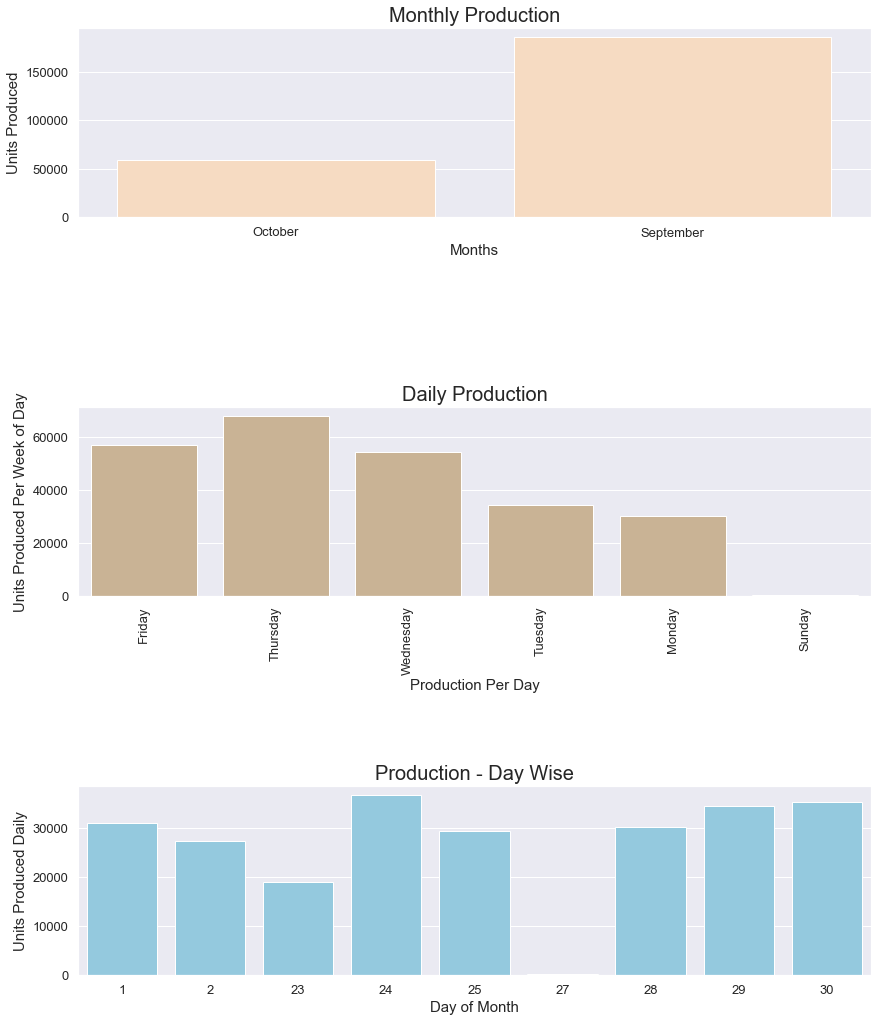

In [24]:
#ticks = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
# Let's see the distribution of the timestamps
plt.subplots(3,1, figsize = (14,16))

# Subplot 1:  Show's production levels for the month of September and October
plt.subplot(3,1,1)
sns.countplot(BTSR['Month'], color = 'peachpuff')
plt.title('Monthly Production', fontsize = 20)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Units Produced', fontsize = 15)

# Subplot 2 for showing production on a weekly basis
plt.subplot(3,1,2)
sns.countplot(BTSR['Day Name'], color = 'tan')
plt.title('Daily Production', fontsize = 20)
plt.xlabel('Production Per Day', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Units Produced Per Week of Day', fontsize = 15)

# Building a third subplot to show distribution of production over the different days
plt.subplot(3,1,3)
sns.countplot(BTSR['Day'], color = 'skyblue')
plt.title('Production - Day Wise', fontsize = 20)
plt.xlabel('Day of Month', fontsize = 15)
plt.ylabel('Units Produced Daily', fontsize = 15)


# Ensuring plots have enough padding around it
plt.tight_layout(pad = 6)
plt.show()

When looking at the visuals above, there seems to be an imbalance in the dataset, but again, this is because most days of production were in October rather than September. 

Secondly, looking at the plot in the middle which shows the daily production on a given day in a week - it seems like **Thursdays** are the days when most production is **highest** while **Mondays** is the **least** between normal business days. However, we can see that there is a slight number of tubes produced on Sunday. In the given dataset, the production for Sundays between **September 23rd, 2020, to October 02, 2020**, was **358** However, the imbalances are due to having a few repetitive days within the dataset. 

Maximum production took place on **September 24th, 2020** while the least productive day seems to have been **September 23rd, 2020**. 

In [25]:
# Printing out the statements so that manual input is not required. 
print("It seem's like we have" ,len(BTSR[BTSR['Day Name'] == 'Sunday']),"tubes produced on a Sundays")
print()
print("Another observation is that on the 27th, there were",
      len(BTSR[BTSR['Day'] == '27']),
      'tubes produced but we do have a count of 358 tubes being produced on Sunday. Thus, there seems to be either some sort of backlog, or one of the Sundays, some employees had worked.')


It seem's like we have 358 tubes produced on a Sundays

Another observation is that on the 27th, there were 0 tubes produced but we do have a count of 358 tubes being produced on Sunday. Thus, there seems to be either some sort of backlog, or one of the Sundays, some employees had worked.


### Cross Check Tube Count

The second dataset is a man-made dataset, where a (non-technical) team member has visited the machine, counted tubes, and wrote down the number of tubes that have been knit. Each row is data on a specific machine (Machine Type A #01 = Machine Number 1) and contains information on when the machine was visited from 2020-09-28 to 2020-10-02 and the associated tube count. For example, if a machine has a tube count of 3269 on Tuesday morning and 3281 on Tuesday afternoon, that means that in that time period 12 tubes were knit.

In [26]:
# Reading in the data for Cross Checking Tube Count
CCTC = pd.read_csv('cross_checking_tube_count_2020-10-02.csv')
CCTC.head()


,Unnamed: 0,machine_number,Tuesday AM,Unnamed: 2,10:44 AM,Tuesday PM,Unnamed: 5,2:05 PM,Wednesday AM,Unnamed: 8,1:55 PM,Wednesday PM,Unnamed: 11,3:55,Thursday AM,Unnamed: 14,1015,Thursday PM,Unnamed: 17,830,Friday AM,Unnamed: 20,1055,Friday PM,Unnamed: 23,458
0,0,NaN,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Machine Type A #01,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,NaN,2272,2020-09-30 15:55:00,NaN,2272,2020-10-01 10:15:00,NaN,2311,2020-10-01 20:30:00,NaN,2389,2020-10-02 10:55:00,NaN,2421,2020-10-02 16:58:00,NaN
3,3,Machine Type A #02,3269,2020-09-29 10:44:30,Stop zero received from LWS,3281,2020-09-29 14:05:20,Stop zero received from LWS,3329,2020-09-30 13:55:20,Stop zero received from LWS,3334,2020-09-30 15:55:20,NaN,3431,2020-10-01 10:15:20,NaN,3470,2020-10-01 20:30:20,NaN,3536,2020-10-02 10:55:20,NaN,3571,2020-10-02 16:58:20,NaN
4,4,Machine Type A #03,8408,2020-09-29 10:45:00,NaN,8446,2020-09-29 14:05:40,NaN,8883,2020-09-30 13:55:40,NaN,8903,2020-09-30 15:55:40,Sensor stop S2 intervention,9031,2020-10-01 10:15:40,NaN,9022,2020-10-01 20:30:40,NaN,9022,2020-10-02 10:55:40,stitch cam motor error,9022,2020-10-02 16:58:40,NaN


In [27]:
# Just to get some unique information about the data
print("Unique Machines in Production:",CCTC['machine_number'].nunique())

Unique Machines in Production: 75


Some observations regarding the DataFrame above: 
- One of the first ones here 
- When taking a closer look, it seems like the first row is to be the columns while the first column is to be the index. It might be a possibility that when data was being put into the system after manual observations, it may have not been structured properly which brings me to my second assumption
- Second, there could be a possibility that once data is transposed, it may be clearer to look at. 
- Third, the 2nd row (index = 1) seems to be an empty row entirely and will have to be dropped
- Fourth, each machine has certain observations and contains information regarding the each observation:
    - The `Tube Count` 
    - The `Timestamp` 
    - The `Notes / Status`

In [28]:
# Getting the basic information on 
CCTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 26 columns):
Unnamed: 0        77 non-null int64
machine_number    75 non-null object
Tuesday AM        61 non-null object
Unnamed: 2        76 non-null object
10:44 AM          40 non-null object
Tuesday PM        68 non-null object
Unnamed: 5        76 non-null object
2:05 PM           37 non-null object
Wednesday AM      70 non-null object
Unnamed: 8        76 non-null object
1:55 PM           34 non-null object
Wednesday PM      71 non-null object
Unnamed: 11       76 non-null object
3:55              27 non-null object
Thursday AM       69 non-null object
Unnamed: 14       76 non-null object
1015              23 non-null object
Thursday PM       69 non-null object
Unnamed: 17       76 non-null object
830               25 non-null object
Friday AM         72 non-null object
Unnamed: 20       76 non-null object
1055              9 non-null object
Friday PM         63 non-null object
Unnamed: 23

In [29]:
#
CCTC.describe()

,Unnamed: 0
count,77.000000
mean,38.000000
std,22.371857
min,0.000000
25%,19.000000
50%,38.000000
75%,57.000000
max,76.000000


In [30]:
# Checking for null values
CCTC.isnull().sum()

Unnamed: 0         0
machine_number     2
Tuesday AM        16
Unnamed: 2         1
10:44 AM          37
                  ..
Unnamed: 20        1
1055              68
Friday PM         14
Unnamed: 23        1
458               52
Length: 26, dtype: int64

In [31]:
# Checking for duplicates
print("There are",CCTC.duplicated().sum(),'duplicated values in this dataset')
print()
print('However, the dataset does comprises of some null values')

There are 0 duplicated values in this dataset

However, the dataset does comprises of some null values


In [32]:
# Let's take a look at the proportion of missing values
CCTC.isna().sum()

Unnamed: 0         0
machine_number     2
Tuesday AM        16
Unnamed: 2         1
10:44 AM          37
                  ..
Unnamed: 20        1
1055              68
Friday PM         14
Unnamed: 23        1
458               52
Length: 26, dtype: int64

In [33]:
# Let's take a look at the proportion of missing values
CCTC.isna().sum() / len(CCTC)

Unnamed: 0        0.000000
machine_number    0.025974
Tuesday AM        0.207792
Unnamed: 2        0.012987
10:44 AM          0.480519
                    ...   
Unnamed: 20       0.012987
1055              0.883117
Friday PM         0.181818
Unnamed: 23       0.012987
458               0.675325
Length: 26, dtype: float64

In [34]:
# Let's drop the Unnamed column first
CCTC.drop(columns = 'Unnamed: 0',axis = 1, inplace = True)

# Dropping the first index as it seems to be an empty line of nulls
CCTC.drop(index = 1, inplace = True, axis = 0)

# Resetting the index after dropping the first for consistency
CCTC.reset_index(drop = True, inplace = True)

# Setting the index as the machine numbers
#CCTC.set_index(drop = True, keys = 'machine_number', inplace = True)

# Setting up the columns as the first row since they seem to be the headers
CCTC.columns = CCTC.iloc[0]

# Dropping the first valid index
CCTC.drop(index = CCTC.first_valid_index(), inplace = True)

# Renaming the first column as machine_number
CCTC.rename(columns={CCTC.columns[0]: "machine_number" }, inplace = True)

# Strippign the rest of the non-numerical content from the list, and stripping the 0's on the left of the machine numbers
CCTC['machine_number'] = CCTC['machine_number'].str.replace(r'\D+', '')
CCTC['machine_number'] = [s.lstrip("0") for s in CCTC['machine_number']]

# There's a lot of NaN's within the Notes/Status so we're going to fill these up as well
CCTC['Notes / Status '].fillna(value = '-', inplace = True)

# Taking a look at the Dataframe again
CCTC.head(20)

,machine_number,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status
1,1,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,NaN,2272,2020-09-30 15:55:00,NaN,2272,2020-10-01 10:15:00,NaN,2311,2020-10-01 20:30:00,NaN,2389,2020-10-02 10:55:00,NaN,2421,2020-10-02 16:58:00,NaN
2,2,3269,2020-09-29 10:44:30,Stop zero received from LWS,3281,2020-09-29 14:05:20,Stop zero received from LWS,3329,2020-09-30 13:55:20,Stop zero received from LWS,3334,2020-09-30 15:55:20,NaN,3431,2020-10-01 10:15:20,NaN,3470,2020-10-01 20:30:20,NaN,3536,2020-10-02 10:55:20,NaN,3571,2020-10-02 16:58:20,NaN
3,3,8408,2020-09-29 10:45:00,NaN,8446,2020-09-29 14:05:40,NaN,8883,2020-09-30 13:55:40,NaN,8903,2020-09-30 15:55:40,Sensor stop S2 intervention,9031,2020-10-01 10:15:40,NaN,9022,2020-10-01 20:30:40,NaN,9022,2020-10-02 10:55:40,stitch cam motor error,9022,2020-10-02 16:58:40,NaN
4,4,2996,2020-09-29 10:45:30,NaN,3007,2020-09-29 14:06:00,NaN,3123,2020-09-30 13:56:00,NaN,3131,2020-09-30 15:56:00,NaN,3198,2020-10-01 10:16:00,NaN,3246,2020-10-01 20:31:00,NaN,3266,2020-10-02 10:56:00,NaN,3289,2020-10-02 16:59:00,NaN
5,5,2495,2020-09-29 10:46:00,Sensor stop S1 intervention,2509,2020-09-29 14:06:20,NaN,2545,2020-09-30 13:56:20,NaN,2553,2020-09-30 15:56:20,NaN,2623,2020-10-01 10:16:20,Sensor stop S2 intervention,2661,2020-10-01 20:31:20,Stop zero received from LWS,2722,2020-10-02 10:56:20,Stop zero received from LWS,2752,2020-10-02 16:59:20,NaN
6,6,82032,2020-09-29 10:46:30,NaN,82039,2020-09-29 14:06:40,NaN,82097,2020-09-30 13:56:40,Sensor stop S2 intervention,82104,2020-09-30 15:56:40,NaN,82151,2020-10-01 10:16:40,EL yarn stop activation,82169,2020-10-01 20:31:40,Stop zero received from LWS,82217,2020-10-02 10:56:40,NaN,82242,2020-10-02 16:59:40,NaN
7,7,3285,2020-09-29 10:47:00,NaN,3288,2020-09-29 14:07:00,NaN,3392,2020-09-30 13:57:00,NaN,3402,2020-09-30 15:57:00,NaN,3509,2020-10-01 10:17:00,NaN,3544,2020-10-01 20:32:00,NaN,3624,2020-10-02 10:57:00,NaN,3650,2020-10-02 17:00:00,NaN
8,8,25824,2020-09-29 10:47:30,NaN,25824,2020-09-29 14:07:20,NaN,25797,2020-09-30 13:57:20,NaN,25805,2020-09-30 15:57:20,Stop zero received from LWS,25839,2020-10-01 10:17:20,Sensor stop S1 intervention,25850,2020-10-01 20:32:20,NaN,25884,2020-10-02 10:57:20,NaN,25899,2020-10-02 17:00:20,Stop zero received from LWS
9,9,2158,2020-09-29 10:48:00,EL yarn stop activation,2170,2020-09-29 14:07:40,NaN,2269,2020-09-30 13:57:40,NaN,2274,2020-09-30 15:57:40,NaN,2346,2020-10-01 10:17:40,NaN,2373,2020-10-01 20:32:40,Sensor stop S2 intervention,2418,2020-10-02 10:57:40,NaN,2445,2020-10-02 17:00:40,NaN
10,10,2181,2020-09-29 10:48:30,NaN,2187,2020-09-29 14:08:00,NaN,2279,2020-09-30 13:58:00,butt needle stop intervention,2285,2020-09-30 15:58:00,Sensor stop S2 intervention,2340,2020-10-01 10:18:00,NaN,2374,2020-10-01 20:33:00,Stop zero received from LWS,2405,2020-10-02 10:58:00,NaN,2425,2020-10-02 17:01:00,Sensor stop S1 intervention


In [35]:
CCTC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 1 to 75
Data columns (total 25 columns):
machine_number     75 non-null object
Tube Count         60 non-null object
Timestamp          75 non-null object
Notes / Status     39 non-null object
Tube Count         67 non-null object
Timestamp          75 non-null object
Notes / Status     36 non-null object
Tube Count         69 non-null object
Timestamp          75 non-null object
Notes / Status     33 non-null object
Tube Count         70 non-null object
Timestamp          75 non-null object
Notes / Status     26 non-null object
Tube Count         68 non-null object
Timestamp          75 non-null object
Notes / Status     22 non-null object
Tube Count         68 non-null object
Timestamp          75 non-null object
Notes / Status     24 non-null object
Tube Count         71 non-null object
Timestamp          75 non-null object
Notes / Status     8 non-null object
Tube Count         62 non-null object
Timestamp          75 no

In [36]:
CCTC.dtypes

0
machine_number     object
Tube Count         object
Timestamp          object
Notes / Status     object
Tube Count         object
Timestamp          object
Notes / Status     object
Tube Count         object
Timestamp          object
Notes / Status     object
Tube Count         object
Timestamp          object
Notes / Status     object
Tube Count         object
Timestamp          object
Notes / Status     object
Tube Count         object
Timestamp          object
Notes / Status     object
Tube Count         object
Timestamp          object
Notes / Status     object
Tube Count         object
Timestamp          object
Notes / Status     object
dtype: object

In [37]:
#conversion_dict = {'Tube Count' : int64, 'Timestamp' : datetime64, 'Notes / Status ' : 'Notes / Status '}

CCTC['Tube Count'] = CCTC['Tube Count'].apply(pd.to_numeric).fillna(0.0).astype(int)
#CCTC['Tube Count'] = CCTC['Tube Count'].fillna(0.0).astype(int)

In [38]:
CCTC.head()

,machine_number,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status
1,1,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,NaN,2272,2020-09-30 15:55:00,NaN,2272,2020-10-01 10:15:00,NaN,2311,2020-10-01 20:30:00,NaN,2389,2020-10-02 10:55:00,NaN,2421,2020-10-02 16:58:00,NaN
2,2,3269,2020-09-29 10:44:30,Stop zero received from LWS,3281,2020-09-29 14:05:20,Stop zero received from LWS,3329,2020-09-30 13:55:20,Stop zero received from LWS,3334,2020-09-30 15:55:20,NaN,3431,2020-10-01 10:15:20,NaN,3470,2020-10-01 20:30:20,NaN,3536,2020-10-02 10:55:20,NaN,3571,2020-10-02 16:58:20,NaN
3,3,8408,2020-09-29 10:45:00,NaN,8446,2020-09-29 14:05:40,NaN,8883,2020-09-30 13:55:40,NaN,8903,2020-09-30 15:55:40,Sensor stop S2 intervention,9031,2020-10-01 10:15:40,NaN,9022,2020-10-01 20:30:40,NaN,9022,2020-10-02 10:55:40,stitch cam motor error,9022,2020-10-02 16:58:40,NaN
4,4,2996,2020-09-29 10:45:30,NaN,3007,2020-09-29 14:06:00,NaN,3123,2020-09-30 13:56:00,NaN,3131,2020-09-30 15:56:00,NaN,3198,2020-10-01 10:16:00,NaN,3246,2020-10-01 20:31:00,NaN,3266,2020-10-02 10:56:00,NaN,3289,2020-10-02 16:59:00,NaN
5,5,2495,2020-09-29 10:46:00,Sensor stop S1 intervention,2509,2020-09-29 14:06:20,NaN,2545,2020-09-30 13:56:20,NaN,2553,2020-09-30 15:56:20,NaN,2623,2020-10-01 10:16:20,Sensor stop S2 intervention,2661,2020-10-01 20:31:20,Stop zero received from LWS,2722,2020-10-02 10:56:20,Stop zero received from LWS,2752,2020-10-02 16:59:20,NaN


In [39]:
# Checking for null values after doing a little clean up 
CCTC.isnull().sum()

0
machine_number      0
Tube Count          0
Timestamp           0
Notes / Status     36
Tube Count          0
Timestamp           0
Notes / Status     39
Tube Count          0
Timestamp           0
Notes / Status     42
Tube Count          0
Timestamp           0
Notes / Status     49
Tube Count          0
Timestamp           0
Notes / Status     53
Tube Count          0
Timestamp           0
Notes / Status     51
Tube Count          0
Timestamp           0
Notes / Status     67
Tube Count          0
Timestamp           0
Notes / Status     51
dtype: int64

**Let's first fill in these null values using the following:**

- For **`Tube Count`**, we're going to impute the value **0**
- **`Timestamp`** has have any missing values
- For **`Notes / Status`**, we're going to fill it with **-**

In [40]:
#CCTC['Tube Count'].replace(to_replace = np.nan, value = '0', inplace = True)
CCTC['Notes / Status '] = CCTC['Notes / Status '].astype(str)
CCTC['Notes / Status '].fillna(value = '-', inplace = True)
CCTC.head(5)

,machine_number,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status,Tube Count,Timestamp,Notes / Status
1,1,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,nan,2272,2020-09-30 15:55:00,nan,2272,2020-10-01 10:15:00,nan,2311,2020-10-01 20:30:00,nan,2389,2020-10-02 10:55:00,nan,2421,2020-10-02 16:58:00,nan
2,2,3269,2020-09-29 10:44:30,Stop zero received from LWS,3281,2020-09-29 14:05:20,Stop zero received from LWS,3329,2020-09-30 13:55:20,Stop zero received from LWS,3334,2020-09-30 15:55:20,nan,3431,2020-10-01 10:15:20,nan,3470,2020-10-01 20:30:20,nan,3536,2020-10-02 10:55:20,nan,3571,2020-10-02 16:58:20,nan
3,3,8408,2020-09-29 10:45:00,nan,8446,2020-09-29 14:05:40,nan,8883,2020-09-30 13:55:40,nan,8903,2020-09-30 15:55:40,Sensor stop S2 intervention,9031,2020-10-01 10:15:40,nan,9022,2020-10-01 20:30:40,nan,9022,2020-10-02 10:55:40,stitch cam motor error,9022,2020-10-02 16:58:40,nan
4,4,2996,2020-09-29 10:45:30,nan,3007,2020-09-29 14:06:00,nan,3123,2020-09-30 13:56:00,nan,3131,2020-09-30 15:56:00,nan,3198,2020-10-01 10:16:00,nan,3246,2020-10-01 20:31:00,nan,3266,2020-10-02 10:56:00,nan,3289,2020-10-02 16:59:00,nan
5,5,2495,2020-09-29 10:46:00,Sensor stop S1 intervention,2509,2020-09-29 14:06:20,nan,2545,2020-09-30 13:56:20,nan,2553,2020-09-30 15:56:20,nan,2623,2020-10-01 10:16:20,Sensor stop S2 intervention,2661,2020-10-01 20:31:20,Stop zero received from LWS,2722,2020-10-02 10:56:20,Stop zero received from LWS,2752,2020-10-02 16:59:20,nan


In [41]:
CCTC.dtypes

0
machine_number     object
Tube Count          int64
Timestamp          object
Notes / Status     object
Tube Count          int64
Timestamp          object
Notes / Status     object
Tube Count          int64
Timestamp          object
Notes / Status     object
Tube Count          int64
Timestamp          object
Notes / Status     object
Tube Count          int64
Timestamp          object
Notes / Status     object
Tube Count          int64
Timestamp          object
Notes / Status     object
Tube Count          int64
Timestamp          object
Notes / Status     object
Tube Count          int64
Timestamp          object
Notes / Status     object
dtype: object

**Now that we've converted our column datatypes, let's look at renaming these columns per observation**

In [42]:
# Creating a list of CCTC columns
new_columns = list(CCTC.columns)

# Creating a loop to go over the columns in the CCTC dataframe and add suffix's to each observation (3 columns per observation)
for i in range(1,9):
    # appends the new column names at the end of the list
    new_columns.append('Tube Count' + ' ' + str(i))
    new_columns.append('Timestamp' + ' ' + str(i))
    new_columns.append('Notes / Status' + ' ' + str(i))
    # removes the original column names 
    new_columns.remove('Tube Count')
    new_columns.remove('Timestamp')
    new_columns.remove('Notes / Status ')

# Let's go ahead and replace the old column names with the new ones
CCTC.columns = new_columns
CCTC.head(1)


,machine_number,Tube Count 1,Timestamp 1,Notes / Status 1,Tube Count 2,Timestamp 2,Notes / Status 2,Tube Count 3,Timestamp 3,Notes / Status 3,Tube Count 4,Timestamp 4,Notes / Status 4,Tube Count 5,Timestamp 5,Notes / Status 5,Tube Count 6,Timestamp 6,Notes / Status 6,Tube Count 7,Timestamp 7,Notes / Status 7,Tube Count 8,Timestamp 8,Notes / Status 8
1,1,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,nan,2272,2020-09-30 15:55:00,nan,2272,2020-10-01 10:15:00,nan,2311,2020-10-01 20:30:00,nan,2389,2020-10-02 10:55:00,nan,2421,2020-10-02 16:58:00,nan


In [43]:
CCTC['Timestamp 1'] = pd.to_datetime(CCTC['Timestamp 1'])
CCTC['Timestamp 2'] = pd.to_datetime(CCTC['Timestamp 2'])
CCTC['Timestamp 3'] = pd.to_datetime(CCTC['Timestamp 3'])
CCTC['Timestamp 4'] = pd.to_datetime(CCTC['Timestamp 4'])
CCTC['Timestamp 5'] = pd.to_datetime(CCTC['Timestamp 5'])
CCTC['Timestamp 6'] = pd.to_datetime(CCTC['Timestamp 6'])
CCTC['Timestamp 7'] = pd.to_datetime(CCTC['Timestamp 7'])
CCTC['Timestamp 8'] = pd.to_datetime(CCTC['Timestamp 8'])

In [44]:
CCTC['Timestamp 1']

1    2020-09-29 10:44:00
2    2020-09-29 10:44:30
3    2020-09-29 10:45:00
4    2020-09-29 10:45:30
5    2020-09-29 10:46:00
             ...        
71   2020-09-29 11:24:40
72   2020-09-29 11:25:10
73   2020-09-29 11:25:40
74   2020-09-29 11:26:10
75   2020-09-29 11:26:40
Name: Timestamp 1, Length: 75, dtype: datetime64[ns]

**Calculating the time difference between each observation and the tube count**

Here were going to be creating 8 different lists for the different observations for both tube count and timestamps which will later visually represent how the tube count has increased over multiple observations. 

To do this, we will establish a loop which essentially creates a new list every time the observation changes after noting the changes in the previous observation. For instance, when the 2nd observation is taken, it'll create a list of tube counts for all 75 machines and the time stamps for them. There will be a total of 16 additional lists in pairs of two (comprising of timestamps and tube counts)

Later on, we're going to show a Word Cloud visually which essentially will state the repetitive issues across all machines. 

In [45]:
# Time & Tube Count Difference between Observation 1 and 2 
CCTC['Time Diff - Observation 1'] = (CCTC['Timestamp 2'] - CCTC['Timestamp 1']) / np.timedelta64(1,'m')
CCTC['Tube Count - Observation 1'] = CCTC['Tube Count 2'] - CCTC['Tube Count 1']

# Time & Tube CountDifference between Observation 2 and 3 
CCTC['Time Diff - Observation 2'] = (CCTC['Timestamp 3'] - CCTC['Timestamp 2']) / np.timedelta64(1,'m')
CCTC['Tube Count - Observation 2'] = CCTC['Tube Count 3'] - CCTC['Tube Count 2']

# Time & Tube Count Difference between Observation 3 and 4 
CCTC['Time Diff - Observation 3'] = (CCTC['Timestamp 4'] - CCTC['Timestamp 3']) / np.timedelta64(1,'m')
CCTC['Tube Count - Observation 3'] = CCTC['Tube Count 4'] - CCTC['Tube Count 3']

# Time & Tube Count Difference between Observation 4 and 5 
CCTC['Time Diff - Observation 4'] = (CCTC['Timestamp 5'] - CCTC['Timestamp 4']) / np.timedelta64(1,'m')
CCTC['Tube Count - Observation 4'] = CCTC['Tube Count 5'] - CCTC['Tube Count 4']

# Time & Tube Count Difference between Observation 5 and 6  
CCTC['Time Diff - Observation 5'] = (CCTC['Timestamp 6'] - CCTC['Timestamp 5']) / np.timedelta64(1,'m')
CCTC['Tube Count - Observation 5'] = CCTC['Tube Count 6'] - CCTC['Tube Count 5']

# Time & Tube Count Difference between Observation 6 and 7 
CCTC['Time Diff - Observation 6'] = (CCTC['Timestamp 7'] - CCTC['Timestamp 6']) / np.timedelta64(1,'m')
CCTC['Tube Count - Observation 6'] = CCTC['Tube Count 7'] - CCTC['Tube Count 6']

# Time & Tube Count Difference between Observation 7 and 8 
CCTC['Time Diff - Observation 7'] = (CCTC['Timestamp 8'] - CCTC['Timestamp 7']) / np.timedelta64(1,'m')
CCTC['Tube Count - Observation 7'] = CCTC['Tube Count 8'] - CCTC['Tube Count 7']

In [46]:
CCTC.head()

,machine_number,Tube Count 1,Timestamp 1,Notes / Status 1,Tube Count 2,Timestamp 2,Notes / Status 2,Tube Count 3,Timestamp 3,Notes / Status 3,Tube Count 4,Timestamp 4,Notes / Status 4,Tube Count 5,Timestamp 5,Notes / Status 5,Tube Count 6,Timestamp 6,Notes / Status 6,Tube Count 7,Timestamp 7,Notes / Status 7,Tube Count 8,Timestamp 8,Notes / Status 8,Time Diff - Observation 1,Tube Count - Observation 1,Time Diff - Observation 2,Tube Count - Observation 2,Time Diff - Observation 3,Tube Count - Observation 3,Time Diff - Observation 4,Tube Count - Observation 4,Time Diff - Observation 5,Tube Count - Observation 5,Time Diff - Observation 6,Tube Count - Observation 6,Time Diff - Observation 7,Tube Count - Observation 7
1,1,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,nan,2272,2020-09-30 15:55:00,nan,2272,2020-10-01 10:15:00,nan,2311,2020-10-01 20:30:00,nan,2389,2020-10-02 10:55:00,nan,2421,2020-10-02 16:58:00,nan,201.000000,0,1430.0,0,120.0,0,1100.0,0,615.0,39,865.0,78,363.0,32
2,2,3269,2020-09-29 10:44:30,Stop zero received from LWS,3281,2020-09-29 14:05:20,Stop zero received from LWS,3329,2020-09-30 13:55:20,Stop zero received from LWS,3334,2020-09-30 15:55:20,nan,3431,2020-10-01 10:15:20,nan,3470,2020-10-01 20:30:20,nan,3536,2020-10-02 10:55:20,nan,3571,2020-10-02 16:58:20,nan,200.833333,12,1430.0,48,120.0,5,1100.0,97,615.0,39,865.0,66,363.0,35
3,3,8408,2020-09-29 10:45:00,nan,8446,2020-09-29 14:05:40,nan,8883,2020-09-30 13:55:40,nan,8903,2020-09-30 15:55:40,Sensor stop S2 intervention,9031,2020-10-01 10:15:40,nan,9022,2020-10-01 20:30:40,nan,9022,2020-10-02 10:55:40,stitch cam motor error,9022,2020-10-02 16:58:40,nan,200.666667,38,1430.0,437,120.0,20,1100.0,128,615.0,-9,865.0,0,363.0,0
4,4,2996,2020-09-29 10:45:30,nan,3007,2020-09-29 14:06:00,nan,3123,2020-09-30 13:56:00,nan,3131,2020-09-30 15:56:00,nan,3198,2020-10-01 10:16:00,nan,3246,2020-10-01 20:31:00,nan,3266,2020-10-02 10:56:00,nan,3289,2020-10-02 16:59:00,nan,200.500000,11,1430.0,116,120.0,8,1100.0,67,615.0,48,865.0,20,363.0,23
5,5,2495,2020-09-29 10:46:00,Sensor stop S1 intervention,2509,2020-09-29 14:06:20,nan,2545,2020-09-30 13:56:20,nan,2553,2020-09-30 15:56:20,nan,2623,2020-10-01 10:16:20,Sensor stop S2 intervention,2661,2020-10-01 20:31:20,Stop zero received from LWS,2722,2020-10-02 10:56:20,Stop zero received from LWS,2752,2020-10-02 16:59:20,nan,200.333333,14,1430.0,36,120.0,8,1100.0,70,615.0,38,865.0,61,363.0,30


In [47]:
# Average Tube Production since last observation
CCTC['Tube production per minute since last observation 1'] = CCTC['Time Diff - Observation 1'] / CCTC['Tube Count - Observation 1']
CCTC['Tube production per minute since last observation 2'] = CCTC['Time Diff - Observation 2'] / CCTC['Tube Count - Observation 2']
CCTC['Tube production per minute since last observation 3'] = CCTC['Time Diff - Observation 3'] / CCTC['Tube Count - Observation 3']
CCTC['Tube production per minute since last observation 4'] = CCTC['Time Diff - Observation 4'] / CCTC['Tube Count - Observation 4']
CCTC['Tube production per minute since last observation 5'] = CCTC['Time Diff - Observation 5'] / CCTC['Tube Count - Observation 5']
CCTC['Tube production per minute since last observation 6'] = CCTC['Time Diff - Observation 6'] / CCTC['Tube Count - Observation 6']
CCTC['Tube production per minute since last observation 7'] = CCTC['Time Diff - Observation 7'] / CCTC['Tube Count - Observation 7']

CCTC.head(1)

,machine_number,Tube Count 1,Timestamp 1,Notes / Status 1,Tube Count 2,Timestamp 2,Notes / Status 2,Tube Count 3,Timestamp 3,Notes / Status 3,Tube Count 4,Timestamp 4,Notes / Status 4,Tube Count 5,Timestamp 5,Notes / Status 5,Tube Count 6,Timestamp 6,Notes / Status 6,Tube Count 7,Timestamp 7,Notes / Status 7,Tube Count 8,Timestamp 8,Notes / Status 8,Time Diff - Observation 1,Tube Count - Observation 1,Time Diff - Observation 2,Tube Count - Observation 2,Time Diff - Observation 3,Tube Count - Observation 3,Time Diff - Observation 4,Tube Count - Observation 4,Time Diff - Observation 5,Tube Count - Observation 5,Time Diff - Observation 6,Tube Count - Observation 6,Time Diff - Observation 7,Tube Count - Observation 7,Tube production per minute since last observation 1,Tube production per minute since last observation 2,Tube production per minute since last observation 3,Tube production per minute since last observation 4,Tube production per minute since last observation 5,Tube production per minute since last observation 6,Tube production per minute since last observation 7
1,1,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,nan,2272,2020-09-30 15:55:00,nan,2272,2020-10-01 10:15:00,nan,2311,2020-10-01 20:30:00,nan,2389,2020-10-02 10:55:00,nan,2421,2020-10-02 16:58:00,nan,201.0,0,1430.0,0,120.0,0,1100.0,0,615.0,39,865.0,78,363.0,32,inf,inf,inf,inf,15.769231,11.089744,11.34375


In [48]:
CCTC.isnull().sum().sum()

0

**Let's take a final look at the DataFrame**

In [49]:
CCTC.head(5)

,machine_number,Tube Count 1,Timestamp 1,Notes / Status 1,Tube Count 2,Timestamp 2,Notes / Status 2,Tube Count 3,Timestamp 3,Notes / Status 3,Tube Count 4,Timestamp 4,Notes / Status 4,Tube Count 5,Timestamp 5,Notes / Status 5,Tube Count 6,Timestamp 6,Notes / Status 6,Tube Count 7,Timestamp 7,Notes / Status 7,Tube Count 8,Timestamp 8,Notes / Status 8,Time Diff - Observation 1,Tube Count - Observation 1,Time Diff - Observation 2,Tube Count - Observation 2,Time Diff - Observation 3,Tube Count - Observation 3,Time Diff - Observation 4,Tube Count - Observation 4,Time Diff - Observation 5,Tube Count - Observation 5,Time Diff - Observation 6,Tube Count - Observation 6,Time Diff - Observation 7,Tube Count - Observation 7,Tube production per minute since last observation 1,Tube production per minute since last observation 2,Tube production per minute since last observation 3,Tube production per minute since last observation 4,Tube production per minute since last observation 5,Tube production per minute since last observation 6,Tube production per minute since last observation 7
1,1,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,nan,2272,2020-09-30 15:55:00,nan,2272,2020-10-01 10:15:00,nan,2311,2020-10-01 20:30:00,nan,2389,2020-10-02 10:55:00,nan,2421,2020-10-02 16:58:00,nan,201.000000,0,1430.0,0,120.0,0,1100.0,0,615.0,39,865.0,78,363.0,32,inf,inf,inf,inf,15.769231,11.089744,11.343750
2,2,3269,2020-09-29 10:44:30,Stop zero received from LWS,3281,2020-09-29 14:05:20,Stop zero received from LWS,3329,2020-09-30 13:55:20,Stop zero received from LWS,3334,2020-09-30 15:55:20,nan,3431,2020-10-01 10:15:20,nan,3470,2020-10-01 20:30:20,nan,3536,2020-10-02 10:55:20,nan,3571,2020-10-02 16:58:20,nan,200.833333,12,1430.0,48,120.0,5,1100.0,97,615.0,39,865.0,66,363.0,35,16.736111,29.791667,24.0,11.340206,15.769231,13.106061,10.371429
3,3,8408,2020-09-29 10:45:00,nan,8446,2020-09-29 14:05:40,nan,8883,2020-09-30 13:55:40,nan,8903,2020-09-30 15:55:40,Sensor stop S2 intervention,9031,2020-10-01 10:15:40,nan,9022,2020-10-01 20:30:40,nan,9022,2020-10-02 10:55:40,stitch cam motor error,9022,2020-10-02 16:58:40,nan,200.666667,38,1430.0,437,120.0,20,1100.0,128,615.0,-9,865.0,0,363.0,0,5.280702,3.272311,6.0,8.593750,-68.333333,inf,inf
4,4,2996,2020-09-29 10:45:30,nan,3007,2020-09-29 14:06:00,nan,3123,2020-09-30 13:56:00,nan,3131,2020-09-30 15:56:00,nan,3198,2020-10-01 10:16:00,nan,3246,2020-10-01 20:31:00,nan,3266,2020-10-02 10:56:00,nan,3289,2020-10-02 16:59:00,nan,200.500000,11,1430.0,116,120.0,8,1100.0,67,615.0,48,865.0,20,363.0,23,18.227273,12.327586,15.0,16.417910,12.812500,43.250000,15.782609
5,5,2495,2020-09-29 10:46:00,Sensor stop S1 intervention,2509,2020-09-29 14:06:20,nan,2545,2020-09-30 13:56:20,nan,2553,2020-09-30 15:56:20,nan,2623,2020-10-01 10:16:20,Sensor stop S2 intervention,2661,2020-10-01 20:31:20,Stop zero received from LWS,2722,2020-10-02 10:56:20,Stop zero received from LWS,2752,2020-10-02 16:59:20,nan,200.333333,14,1430.0,36,120.0,8,1100.0,70,615.0,38,865.0,61,363.0,30,14.309524,39.722222,15.0,15.714286,16.184211,14.180328,12.100000


## Visualizations

In [50]:
# Printing out the dataframe
BTSR.head(1)

,id,machine_number,tube_sku,yarn,consumption_meters,cycle_id,cycle_timestamp,Year,Month,Day,Hour,Minute,Second,Day Name
0,447955,30,PH-DOTSSHEER0-2XL-B30,yarn_1,494.49,295778,2020-10-02 23:02:28,2020,October,2,23,2,28,Friday


In [51]:
CCTC.head(1)

,machine_number,Tube Count 1,Timestamp 1,Notes / Status 1,Tube Count 2,Timestamp 2,Notes / Status 2,Tube Count 3,Timestamp 3,Notes / Status 3,Tube Count 4,Timestamp 4,Notes / Status 4,Tube Count 5,Timestamp 5,Notes / Status 5,Tube Count 6,Timestamp 6,Notes / Status 6,Tube Count 7,Timestamp 7,Notes / Status 7,Tube Count 8,Timestamp 8,Notes / Status 8,Time Diff - Observation 1,Tube Count - Observation 1,Time Diff - Observation 2,Tube Count - Observation 2,Time Diff - Observation 3,Tube Count - Observation 3,Time Diff - Observation 4,Tube Count - Observation 4,Time Diff - Observation 5,Tube Count - Observation 5,Time Diff - Observation 6,Tube Count - Observation 6,Time Diff - Observation 7,Tube Count - Observation 7,Tube production per minute since last observation 1,Tube production per minute since last observation 2,Tube production per minute since last observation 3,Tube production per minute since last observation 4,Tube production per minute since last observation 5,Tube production per minute since last observation 6,Tube production per minute since last observation 7
1,1,2272,2020-09-29 10:44:00,Stop zero received from LWS,2272,2020-09-29 14:05:00,Stop zero received from LWS,2272,2020-09-30 13:55:00,nan,2272,2020-09-30 15:55:00,nan,2272,2020-10-01 10:15:00,nan,2311,2020-10-01 20:30:00,nan,2389,2020-10-02 10:55:00,nan,2421,2020-10-02 16:58:00,nan,201.0,0,1430.0,0,120.0,0,1100.0,0,615.0,39,865.0,78,363.0,32,inf,inf,inf,inf,15.769231,11.089744,11.34375


In [52]:
# Recreating the original dataframe
df = CCTC[['machine_number',
           'Tube Count 1', 'Timestamp 1', 'Notes / Status 1', 
           'Tube Count 2', 'Timestamp 2', 'Notes / Status 2', 
           'Tube Count 3', 'Timestamp 3', 'Notes / Status 3',
           'Tube Count 4', 'Timestamp 4', 'Notes / Status 4',
           'Tube Count 5', 'Timestamp 5', 'Notes / Status 5',
           'Tube Count 6', 'Timestamp 6', 'Notes / Status 6',
           'Tube Count 7', 'Timestamp 7', 'Notes / Status 7', 
           'Tube Count 8', 'Timestamp 8', 'Notes / Status 8',
          ]]

In [53]:
a = pd.DataFrame(CCTC.groupby(['machine_number'],as_index = False)[['Tube Count 1',
                                                                'Tube Count 2', 
                                                                'Tube Count 3', 
                                                                'Tube Count 4',
                                                                'Tube Count 5', 
                                                                'Tube Count 6',
                                                                'Tube Count 7', 
                                                                'Tube Count 8']].sum())
a.head()

,machine_number,Tube Count 1,Tube Count 2,Tube Count 3,Tube Count 4,Tube Count 5,Tube Count 6,Tube Count 7,Tube Count 8
0,1,2272,2272,2272,2272,2272,2311,2389,2421
1,10,2181,2187,2279,2285,2340,2374,2405,2425
2,11,1165,1168,1234,1239,1303,1333,1382,1400
3,12,109742,109756,109837,109838,109905,109945,110006,110031
4,13,98051,98058,98125,98132,98183,98202,98232,98251


In [54]:
# Buidling out a quick visual to see the step-timing for every observation for these timestamps
b = df[['machine_number','Timestamp 1', 'Timestamp 2',
    'Timestamp 3','Timestamp 4',
    'Timestamp 5','Timestamp 6',
    'Timestamp 7', 'Timestamp 8']]
b.head()

,machine_number,Timestamp 1,Timestamp 2,Timestamp 3,Timestamp 4,Timestamp 5,Timestamp 6,Timestamp 7,Timestamp 8
1,1,2020-09-29 10:44:00,2020-09-29 14:05:00,2020-09-30 13:55:00,2020-09-30 15:55:00,2020-10-01 10:15:00,2020-10-01 20:30:00,2020-10-02 10:55:00,2020-10-02 16:58:00
2,2,2020-09-29 10:44:30,2020-09-29 14:05:20,2020-09-30 13:55:20,2020-09-30 15:55:20,2020-10-01 10:15:20,2020-10-01 20:30:20,2020-10-02 10:55:20,2020-10-02 16:58:20
3,3,2020-09-29 10:45:00,2020-09-29 14:05:40,2020-09-30 13:55:40,2020-09-30 15:55:40,2020-10-01 10:15:40,2020-10-01 20:30:40,2020-10-02 10:55:40,2020-10-02 16:58:40
4,4,2020-09-29 10:45:30,2020-09-29 14:06:00,2020-09-30 13:56:00,2020-09-30 15:56:00,2020-10-01 10:16:00,2020-10-01 20:31:00,2020-10-02 10:56:00,2020-10-02 16:59:00
5,5,2020-09-29 10:46:00,2020-09-29 14:06:20,2020-09-30 13:56:20,2020-09-30 15:56:20,2020-10-01 10:16:20,2020-10-01 20:31:20,2020-10-02 10:56:20,2020-10-02 16:59:20


In [55]:
c = pd.merge(left = a, right =b, on ='machine_number')
c.set_index('machine_number', inplace = True)
c.head()

,Tube Count 1,Tube Count 2,Tube Count 3,Tube Count 4,Tube Count 5,Tube Count 6,Tube Count 7,Tube Count 8,Timestamp 1,Timestamp 2,Timestamp 3,Timestamp 4,Timestamp 5,Timestamp 6,Timestamp 7,Timestamp 8
machine_number,,,,,,,,,,,,,,,,
1,2272,2272,2272,2272,2272,2311,2389,2421,2020-09-29 10:44:00,2020-09-29 14:05:00,2020-09-30 13:55:00,2020-09-30 15:55:00,2020-10-01 10:15:00,2020-10-01 20:30:00,2020-10-02 10:55:00,2020-10-02 16:58:00
10,2181,2187,2279,2285,2340,2374,2405,2425,2020-09-29 10:48:30,2020-09-29 14:08:00,2020-09-30 13:58:00,2020-09-30 15:58:00,2020-10-01 10:18:00,2020-10-01 20:33:00,2020-10-02 10:58:00,2020-10-02 17:01:00
11,1165,1168,1234,1239,1303,1333,1382,1400,2020-09-29 10:49:00,2020-09-29 14:08:20,2020-09-30 13:58:20,2020-09-30 15:58:20,2020-10-01 10:18:20,2020-10-01 20:33:20,2020-10-02 10:58:20,2020-10-02 17:01:20
12,109742,109756,109837,109838,109905,109945,110006,110031,2020-09-29 10:49:30,2020-09-29 14:08:40,2020-09-30 13:58:40,2020-09-30 15:58:40,2020-10-01 10:18:40,2020-10-01 20:33:40,2020-10-02 10:58:40,2020-10-02 17:01:40
13,98051,98058,98125,98132,98183,98202,98232,98251,2020-09-29 10:50:00,2020-09-29 14:09:00,2020-09-30 13:59:00,2020-09-30 15:59:00,2020-10-01 10:19:00,2020-10-01 20:34:00,2020-10-02 10:59:00,2020-10-02 17:02:00


In [56]:
a.set_index('machine_number', inplace = True)

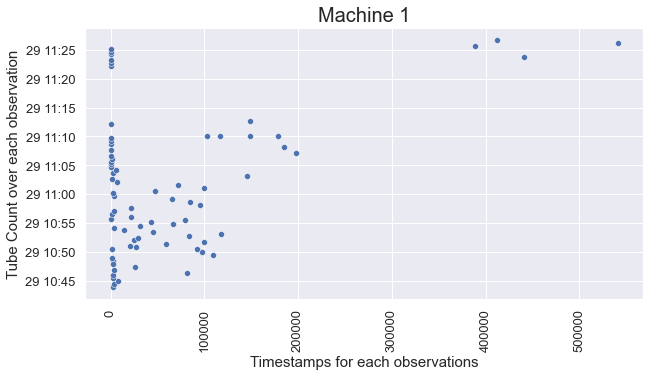

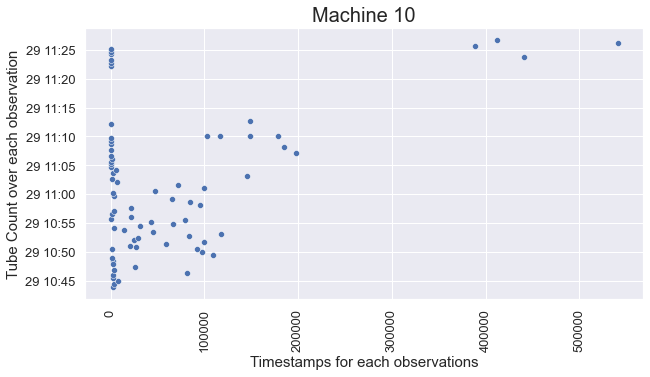

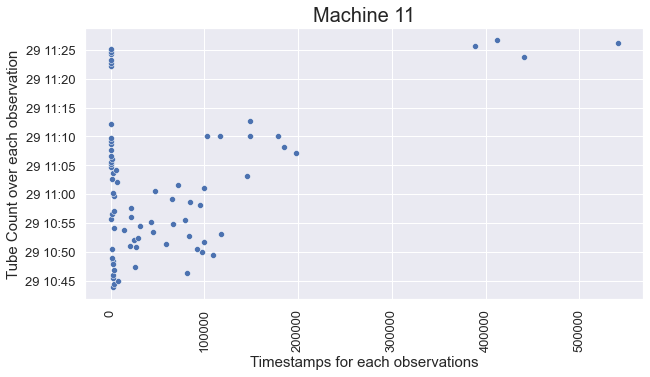

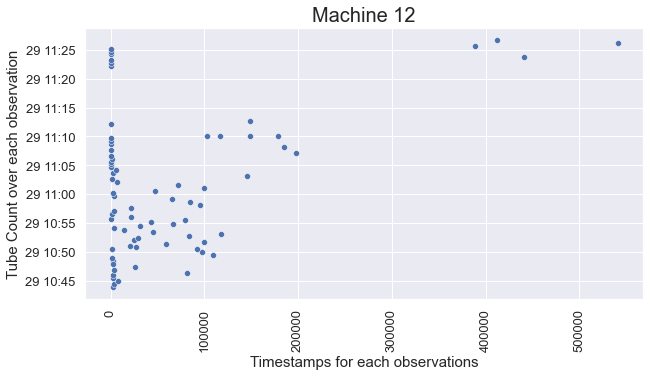

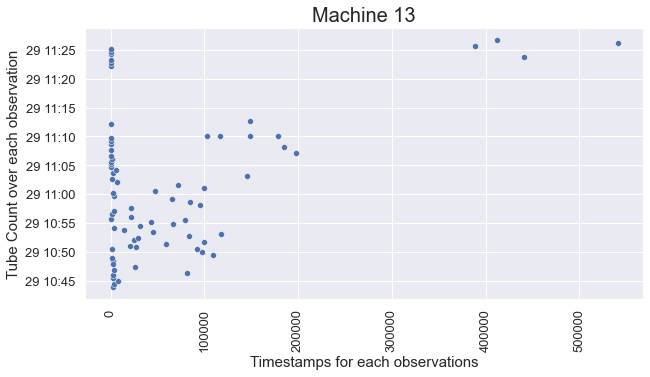

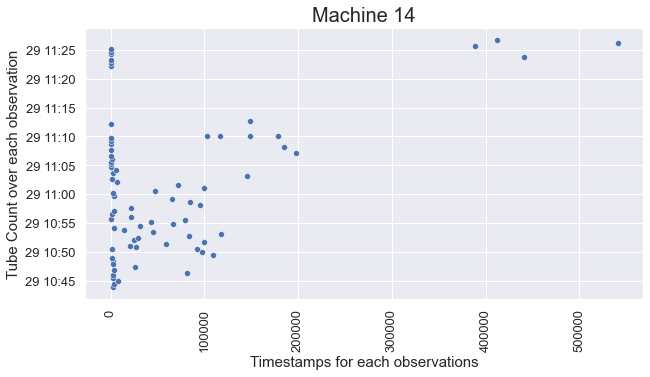

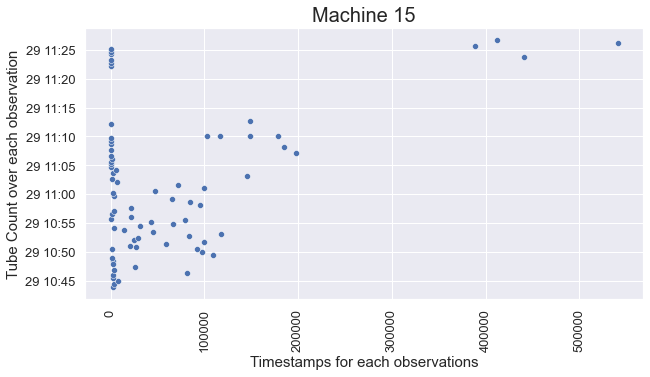

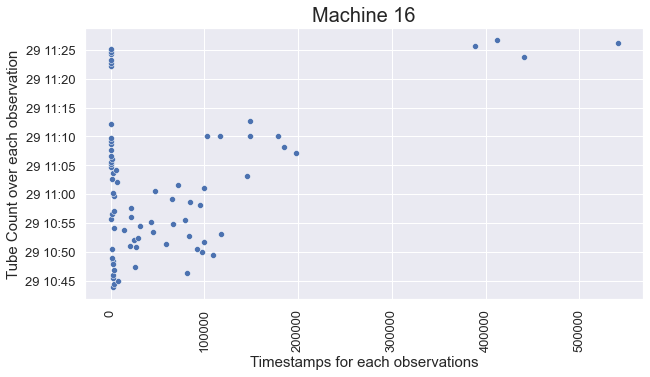

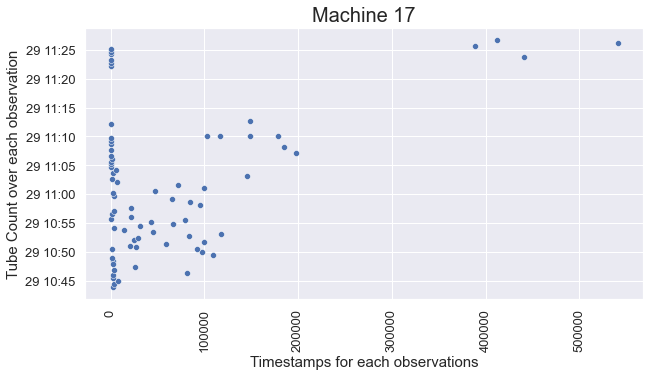

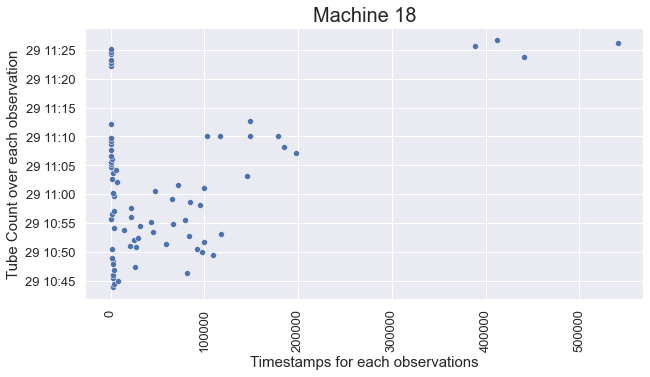

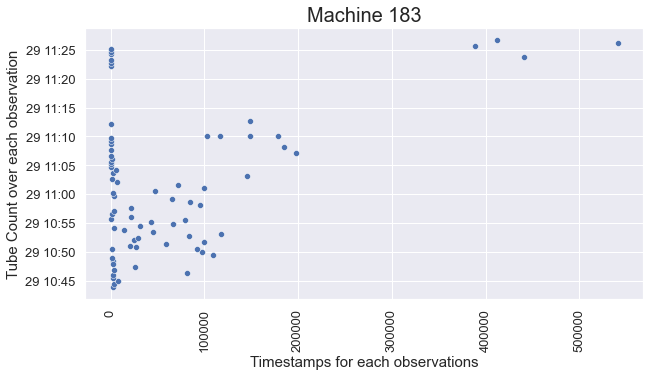

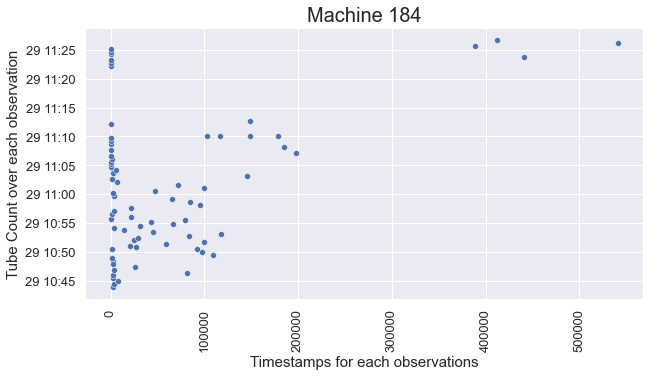

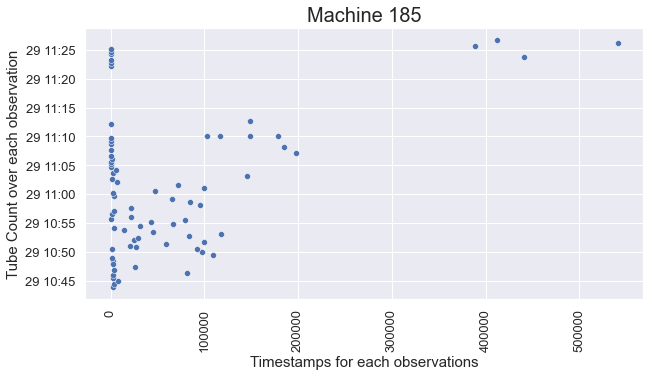

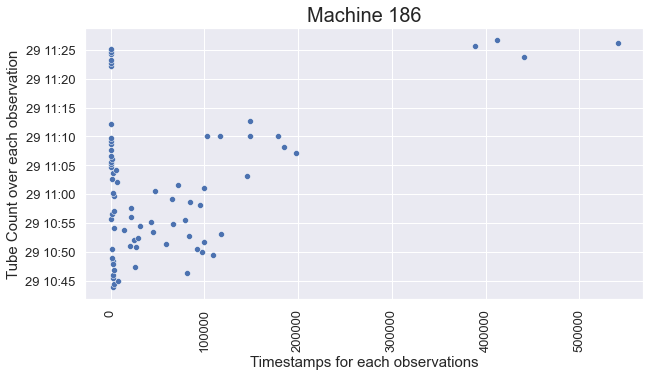

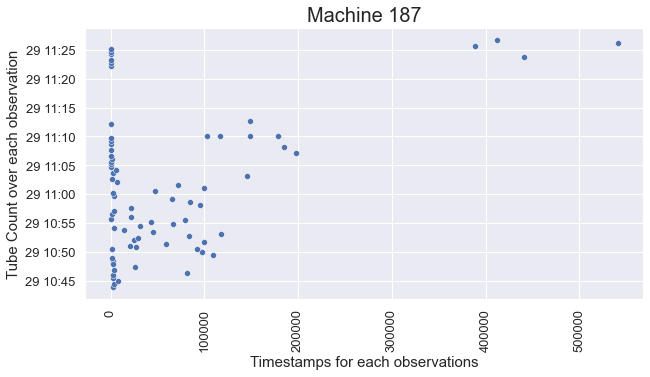

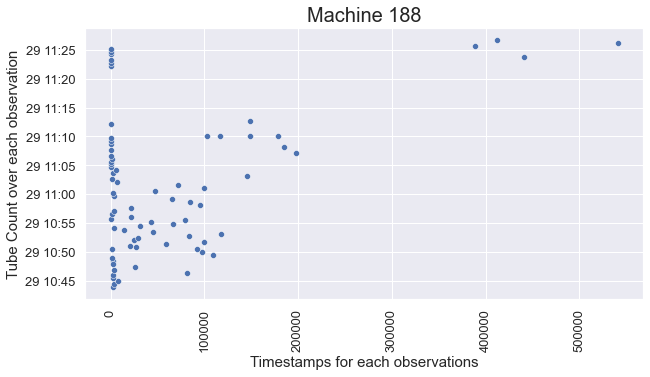

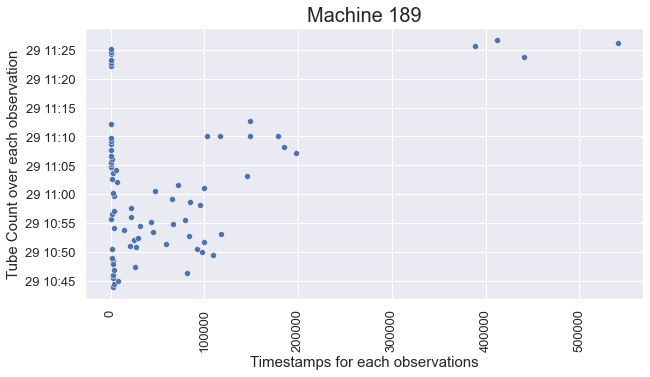

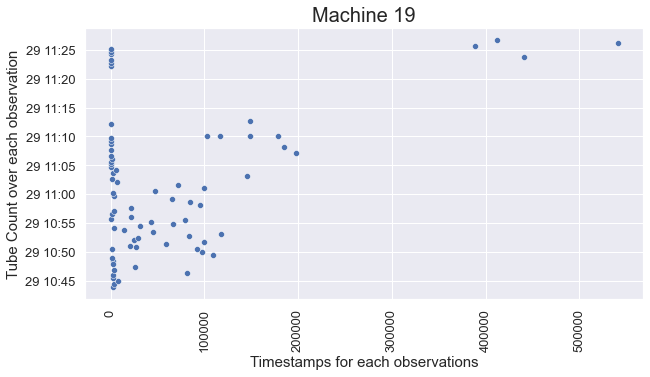

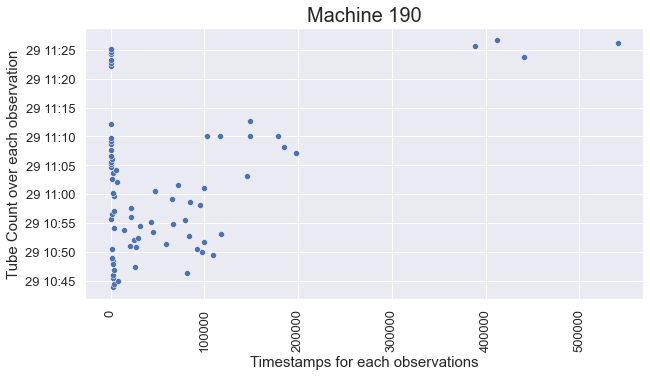

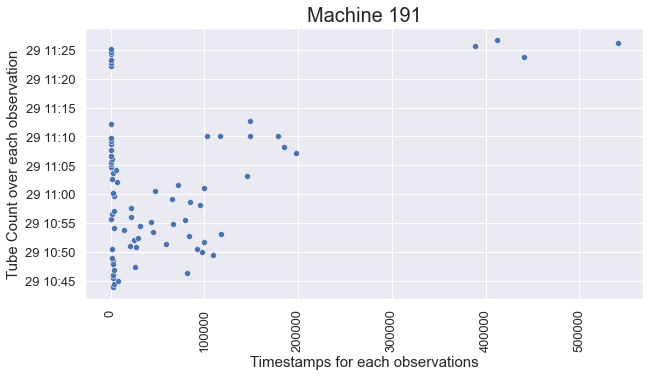

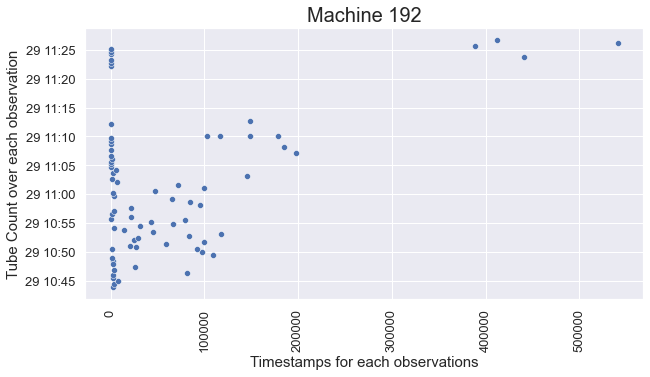

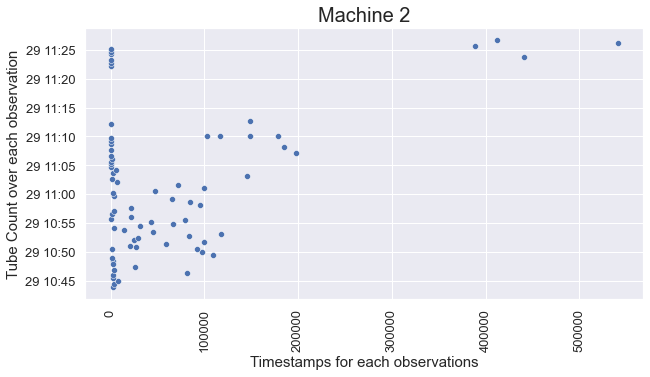

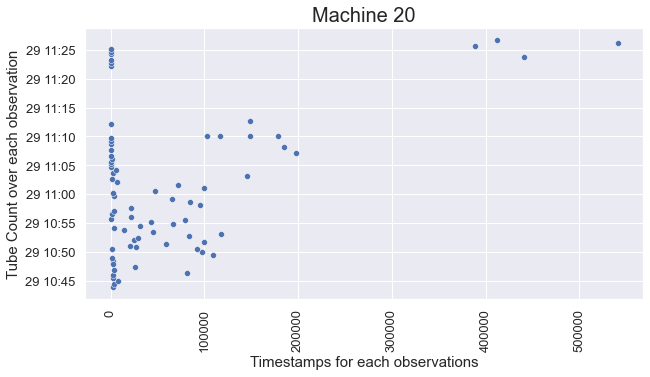

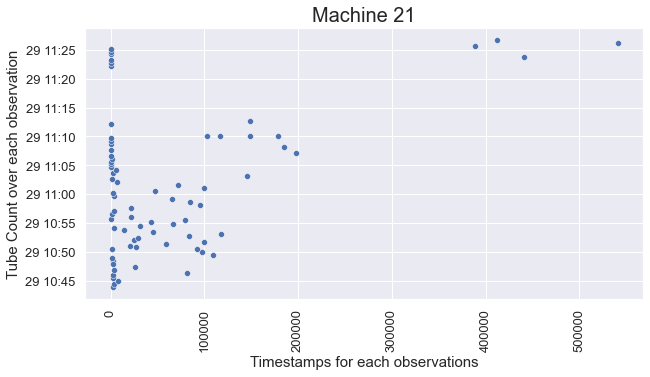

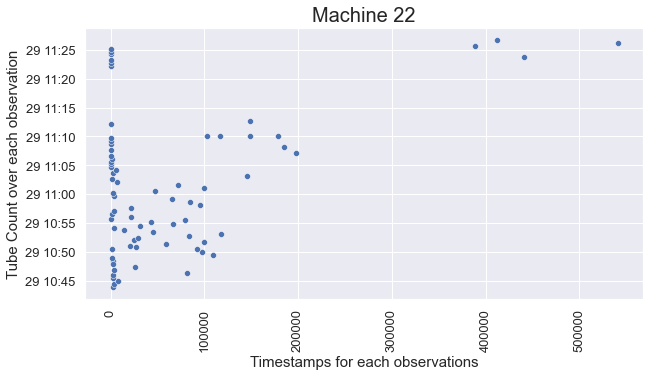

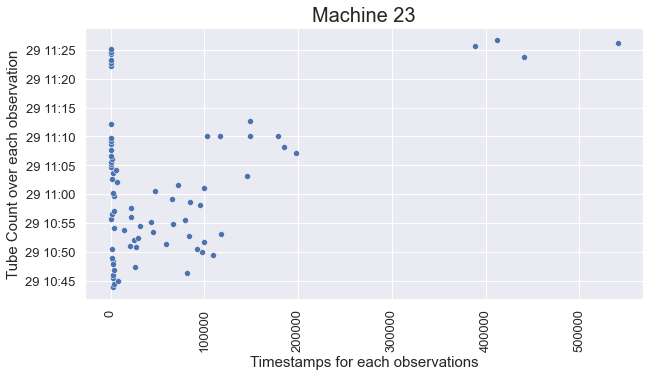

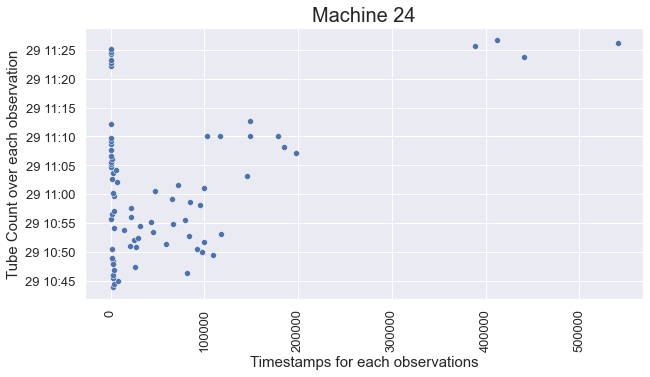

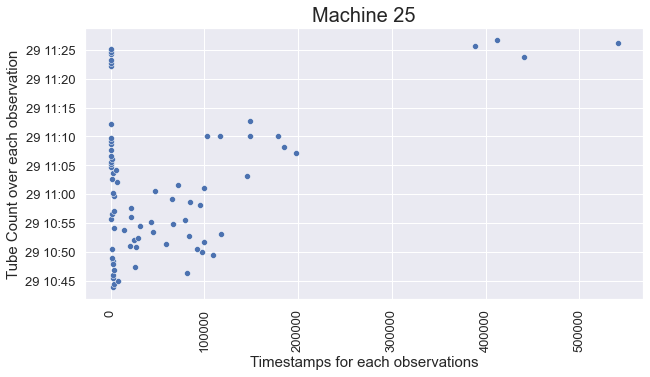

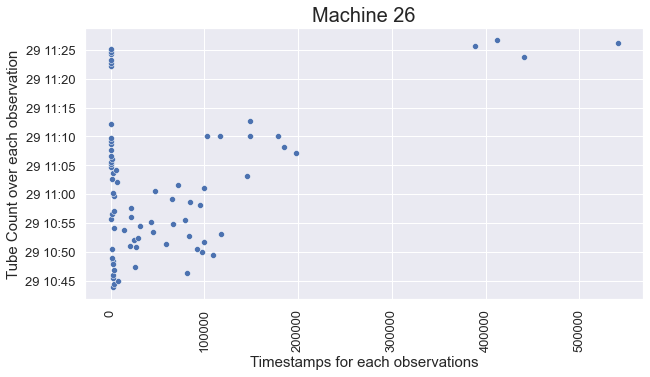

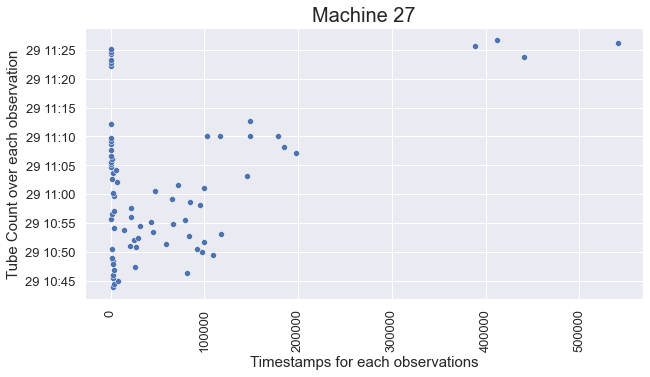

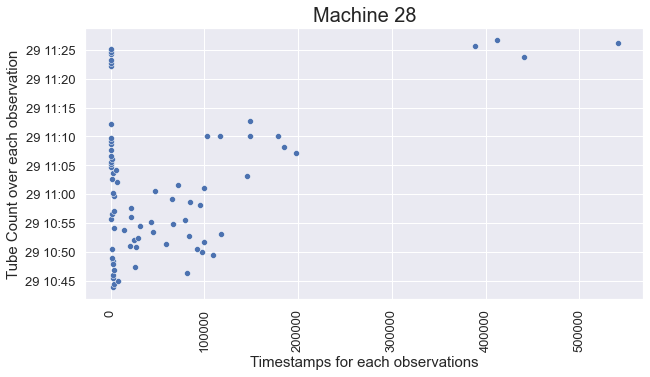

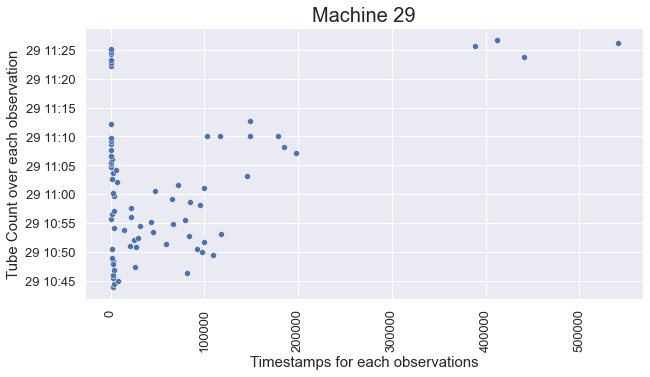

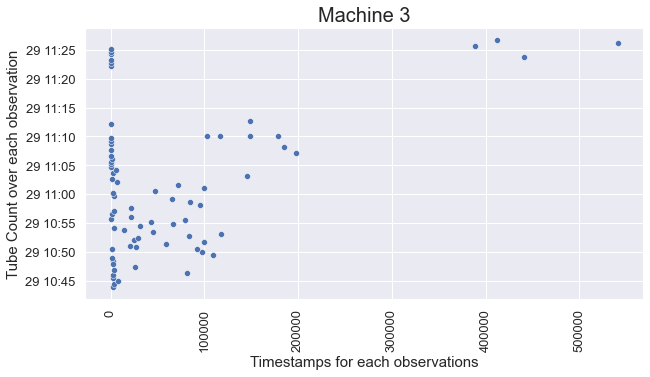

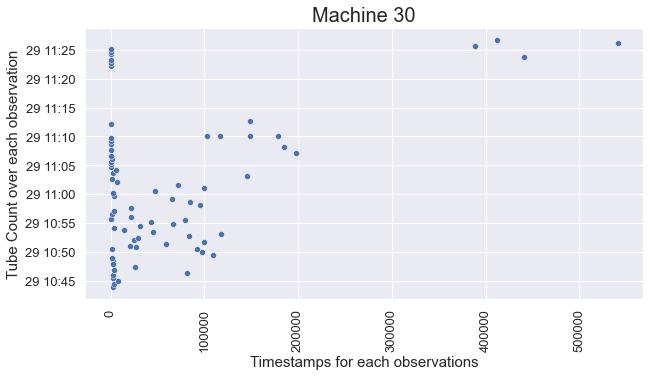

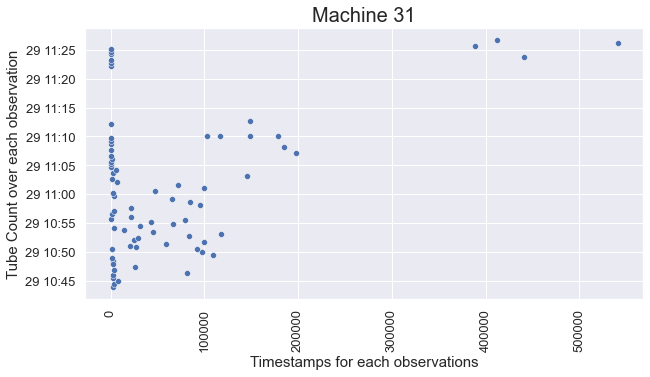

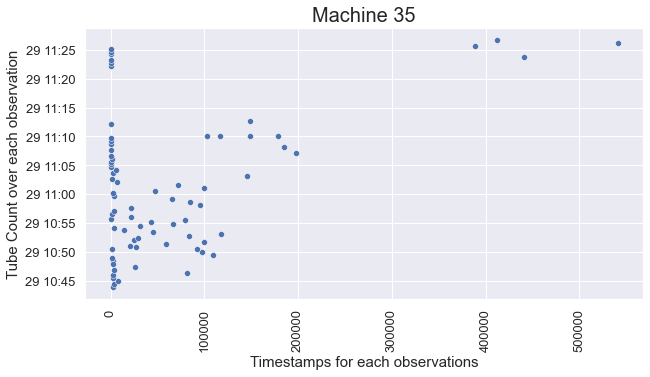

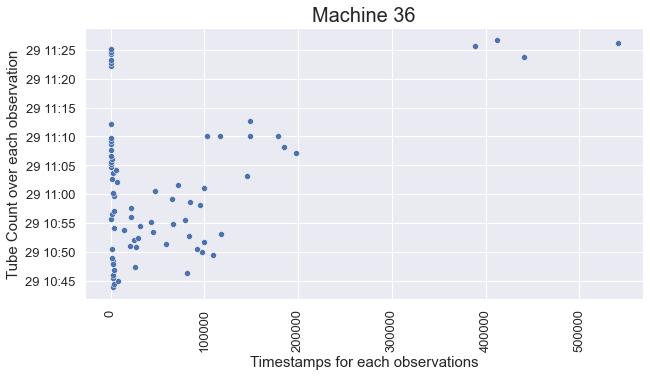

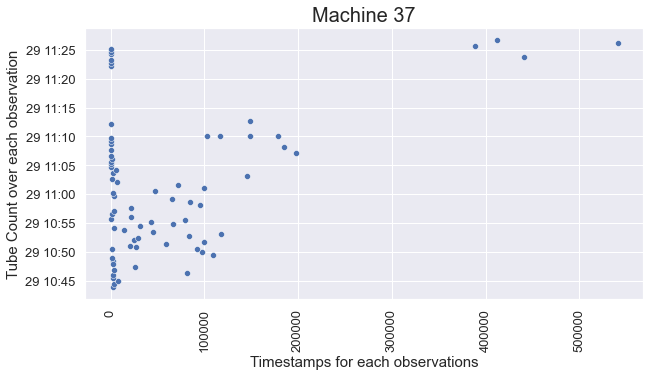

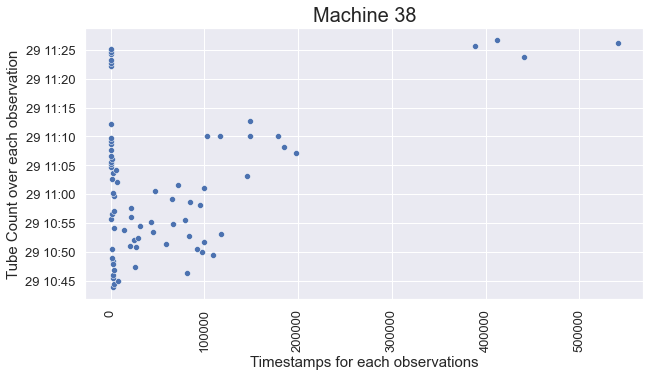

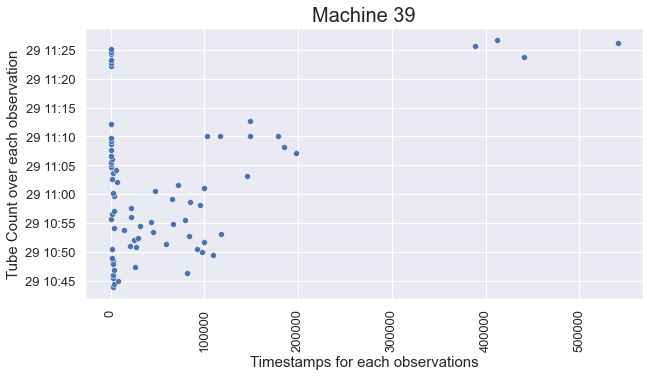

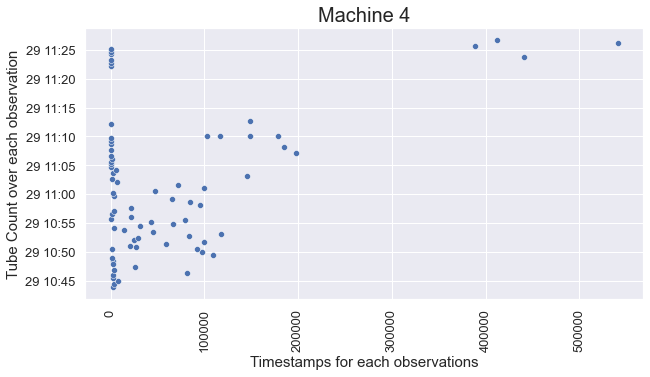

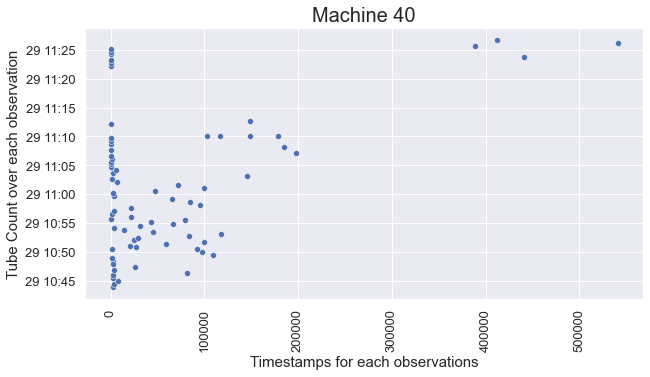

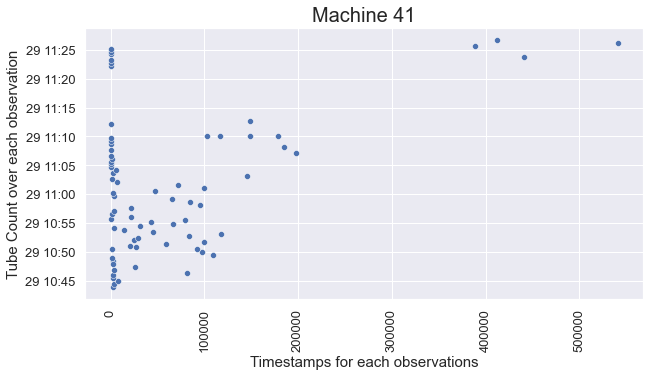

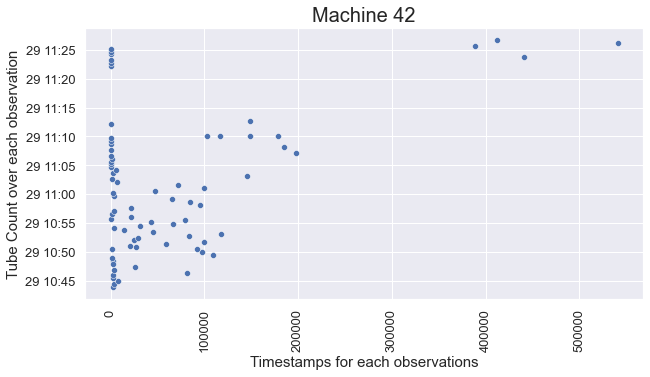

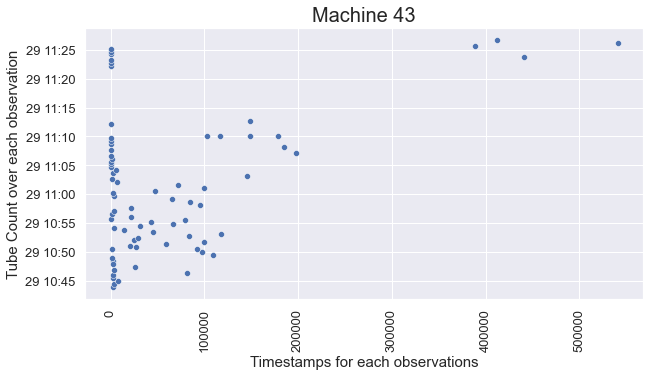

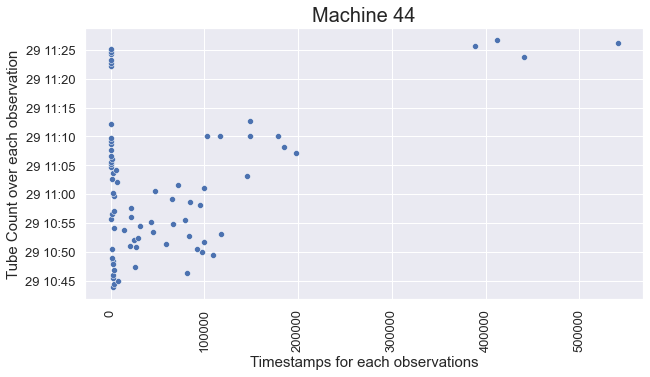

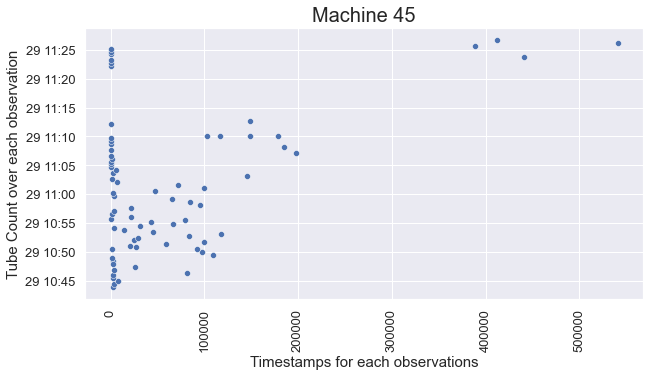

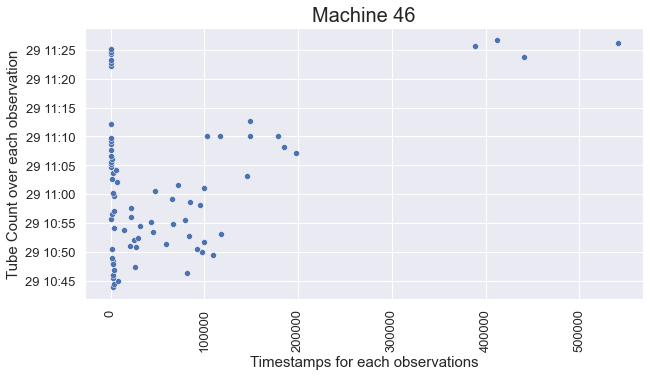

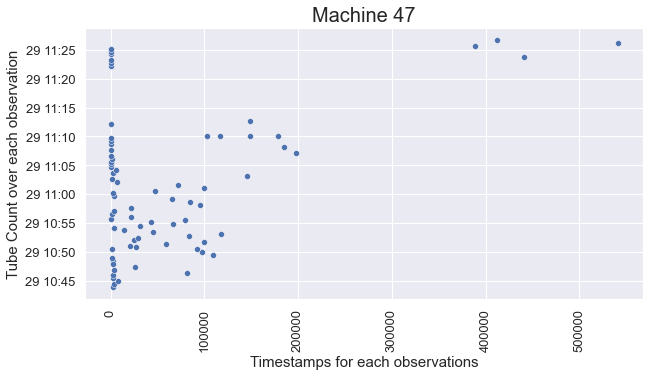

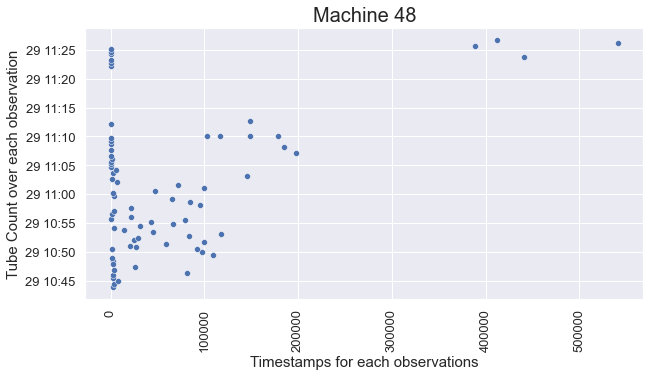

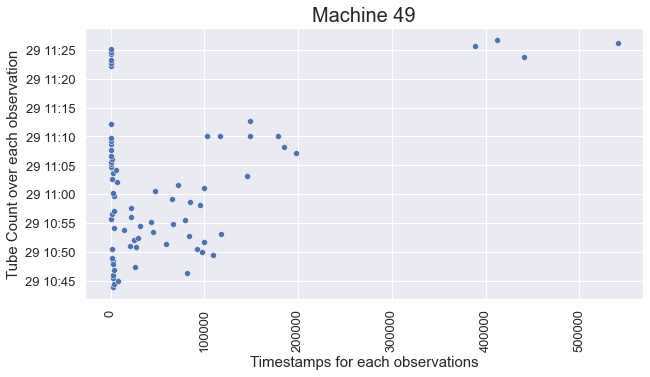

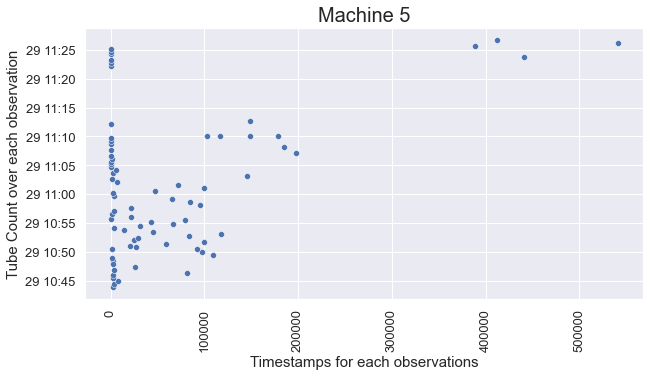

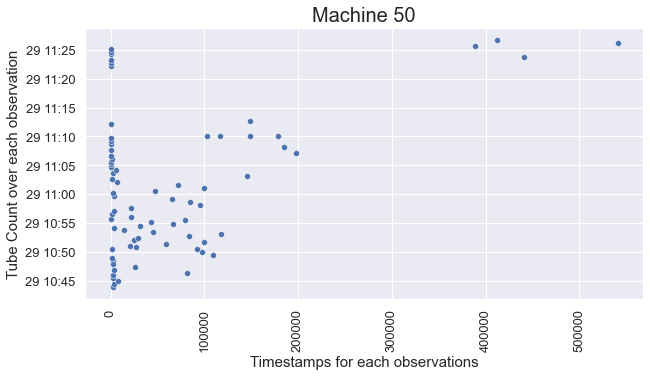

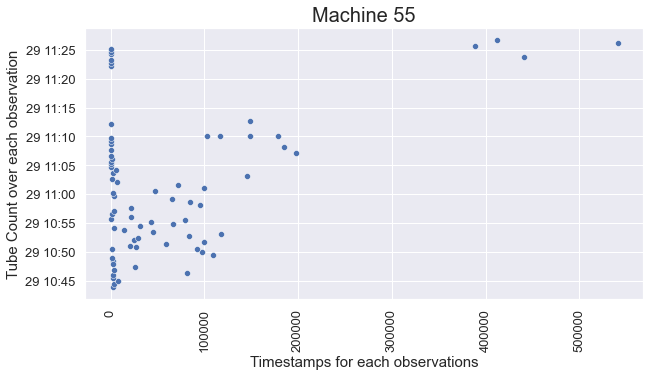

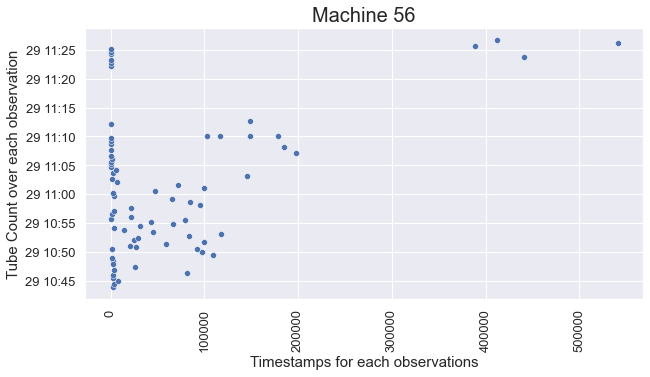

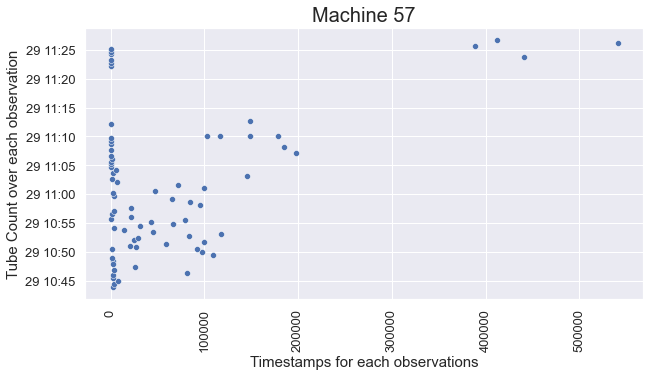

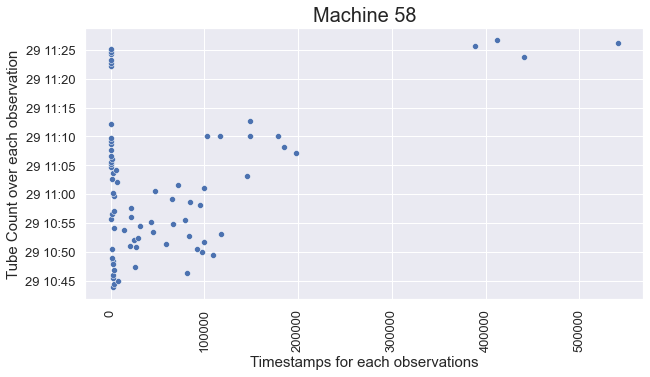

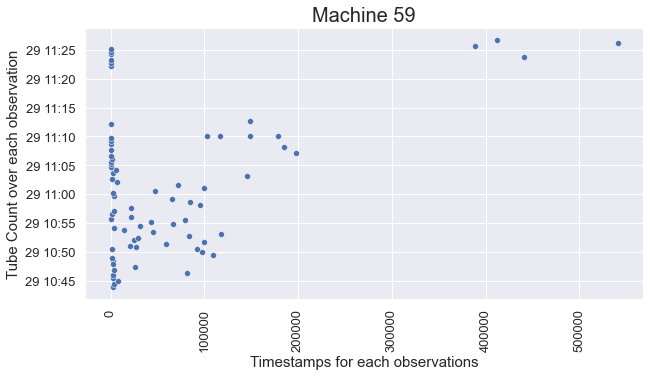

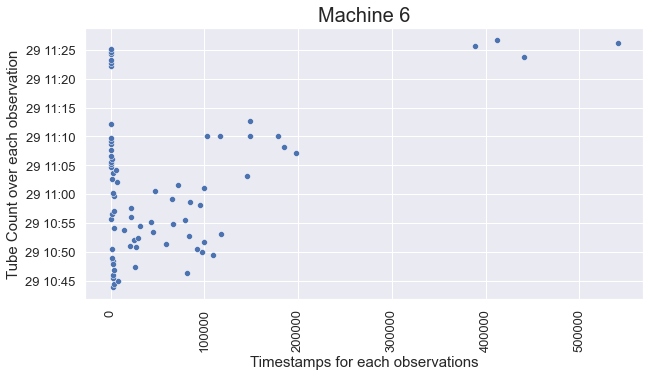

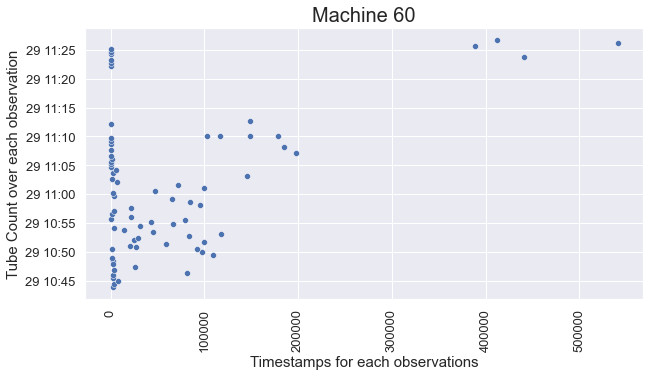

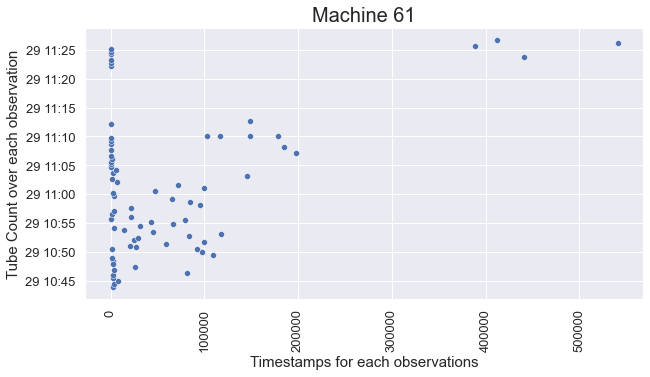

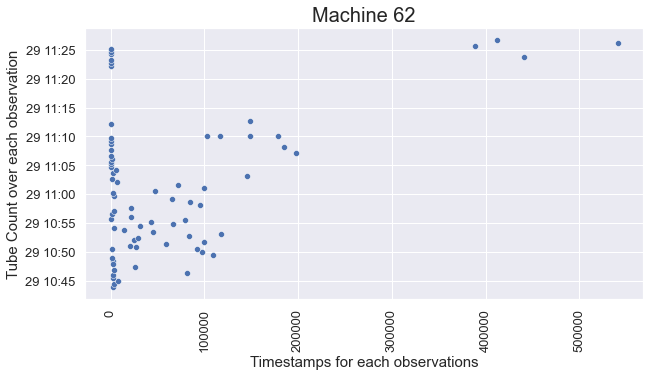

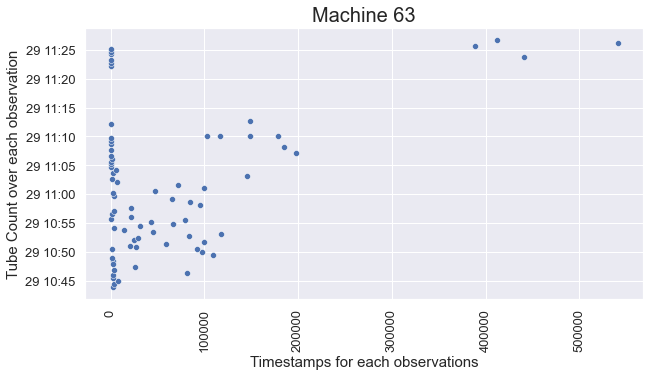

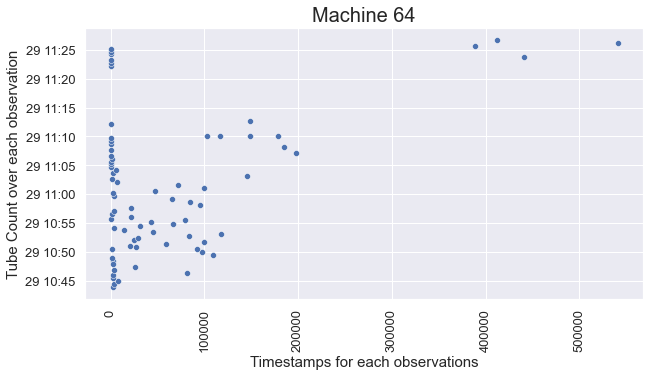

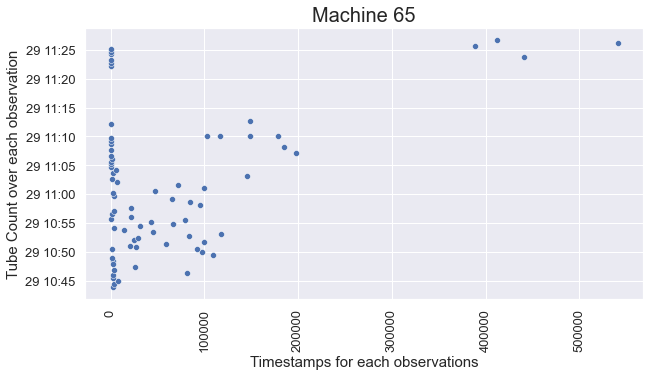

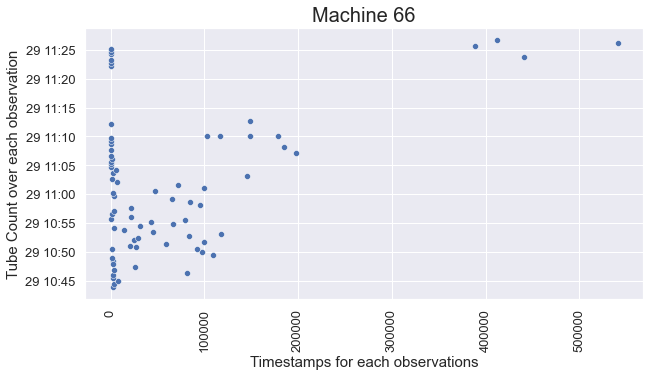

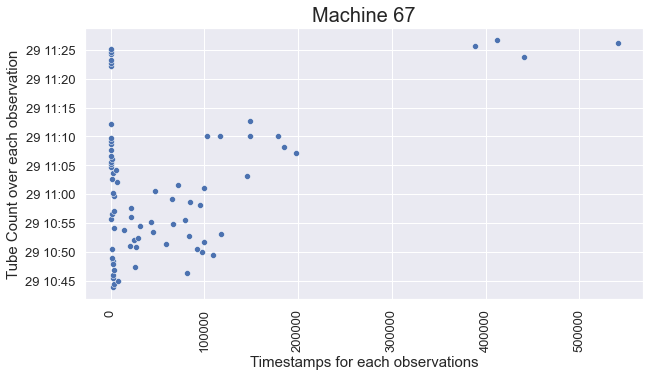

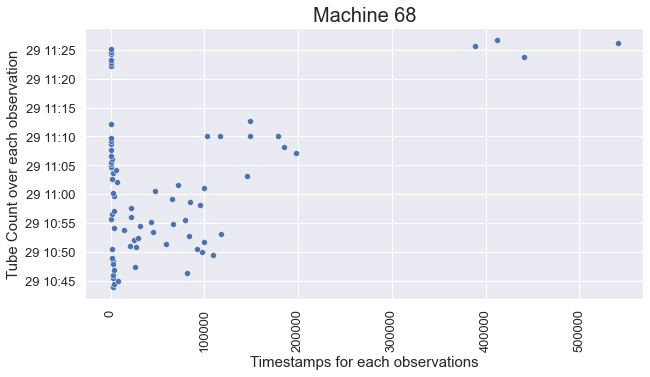

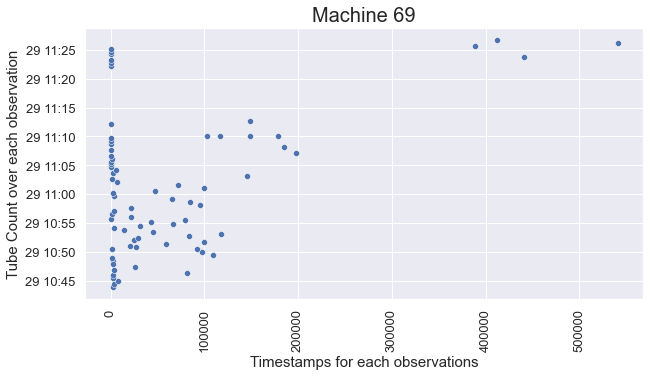

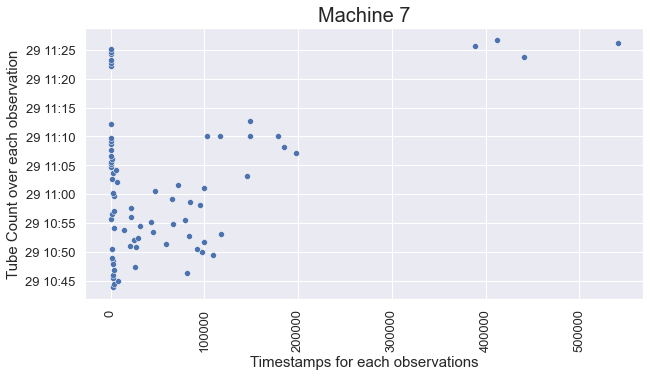

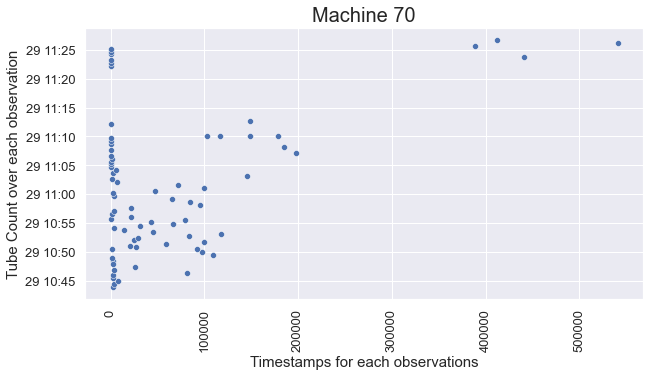

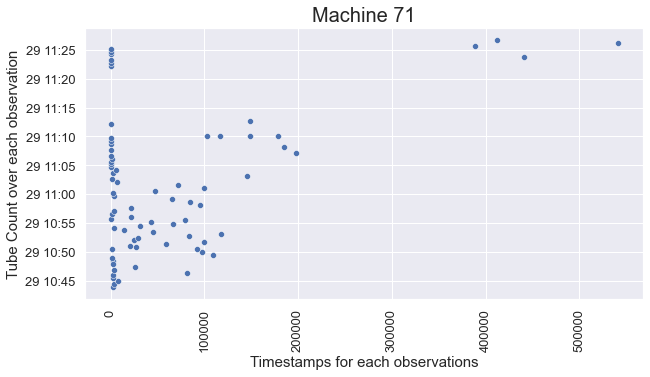

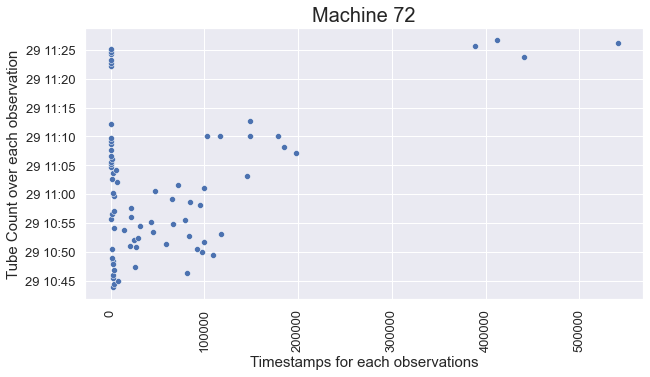

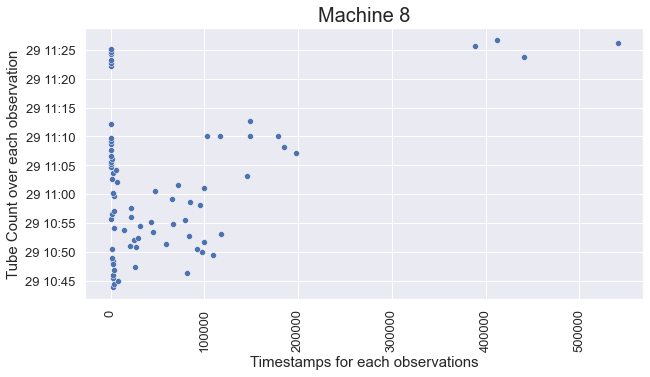

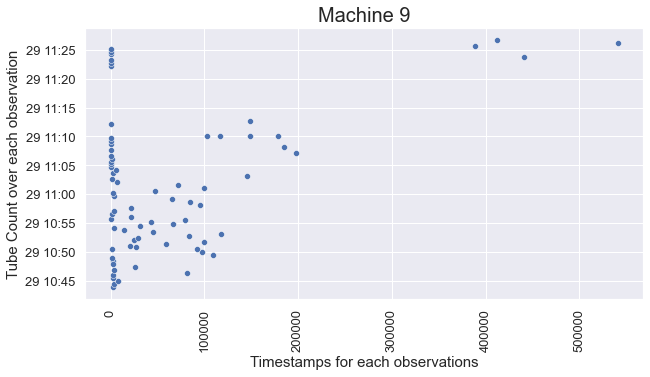

In [57]:
for index in c.index: 
    plt.figure(figsize = (10,5))
    sns.scatterplot(list(c['Tube Count 1']), list(c['Timestamp 1']))
    plt.title('Machine' + " " +  index, fontsize = 20)
    plt.xlabel('Timestamps for each observations', fontsize = 15)
    plt.ylabel('Tube Count over each observation', fontsize = 15)
    plt.xticks(rotation = 90)
    #plt.legend()
    
plt.show()

##### A quick word cloud to visualize the issues being faced in productions by the machines

In [58]:
listofcolumns = [col for col in CCTC.columns if col.startswith('Notes')]

notes = pd.DataFrame(CCTC[listofcolumns])
notes.head()

,Notes / Status 1,Notes / Status 2,Notes / Status 3,Notes / Status 4,Notes / Status 5,Notes / Status 6,Notes / Status 7,Notes / Status 8
1,Stop zero received from LWS,Stop zero received from LWS,nan,nan,nan,nan,nan,nan
2,Stop zero received from LWS,Stop zero received from LWS,Stop zero received from LWS,nan,nan,nan,nan,nan
3,nan,nan,nan,Sensor stop S2 intervention,nan,nan,stitch cam motor error,nan
4,nan,nan,nan,nan,nan,nan,nan,nan
5,Sensor stop S1 intervention,nan,nan,nan,Sensor stop S2 intervention,Stop zero received from LWS,Stop zero received from LWS,nan


Essentially the code block below will display a Word Cloud with the issues being faced overall. However, as to some reason, the Word Cloud package seems to have some bugs and is not running. 

In [59]:
# Additional piece of visually identifying what the issue seems to be in general 
# Creating a wordcloud to see the issues in Notes / Status
#stopwords = set(STOPWORDS)

#listofcolumns = [col for col in CCTC if col.startswith('Notes')]

#listofwords = ''

# Iterating over every word in the column 
#for word in listofcolumns:
    # Iterate over text and split it
#    word = word.split()
    
#    for i in range(len(word)):
        # Lowers each word
#        word[i] = word[i].lower()
        # Joins words with spaces on each ends after lowering it
#        listofwords += " ".join(word) + " "
        
# Setting up our WordCloud
#machine_status = WordCloud(width = 500,
#                          height = 500,
#                          background_color = 'white',
#                         stopwords = stopwords).generate(listofwords)


# Now let's see the wordcloud
#plt.figure()
#plt.title('Most seen issues with the production', fontsize = 20)
#plt.imshow(machine_status)
#plt.axis('off')
#plt.show()
        

## Findings & Insights

While analyzing the data, some of the findings I came across were mentioned as I progressed through the analysis. However, after diving deeper into the datasets, there definitely are insights one can pull from the analysis. Some of these have been mentioned above but as an overall, here are a few:
- On average, a tube_sku uses X amount of yarn in consumption meters
- On average, a machine uses X amount of yarn in consumption meters

- The top product that required the most yarn:
    - **PH-SHEER0-S-B30**
    
- The product that required the least yarn:
    - **PH-LATSEMI0-M-B30**
    
- The machine that required the **most** yarn:
    - **Machine Number 3**
    
- The machine that required the **least** yarn:
    - **Machine Number 63**
    
    
- There are about 85 unique machines in production, however, when the observations were taken, only 75 of them were operational. 
- In 8 days, assuming the Sunday was off, there were about 244,541 tubes produced which gives an average of  ~30,567.6 tubes per day.


# Final Recommendation

Before getting into the final recommendation, there are a few things I'd to discuss. First off, the overall production level seems to be pretty consistent with averaging about 30,000 tubes a day having production run 5 days a week between the hours of 8AM to 11PM. Additionally, in order to best estimate how much yarn is consumed for each tube, this may need further evaluation as from the given production data of 9 days, it can be hard to estimate the need for yarn in each tube. These averages have been calculated based on the different types of unique `tube_skus`, `cycle_id` and have been done above in some of the print statements. 

In terms of the anomalies, the first thing that striked me when analyzing the two datasets was that not all knitting machines were being used. Sheertex seems to have 85 unique machines out of which 75 were being used. If these machines went back into contributing to, it could help increase the average number of tubes produced. Although, the assumption here becomes that all machines were not operational as to maintenance. 

When it comes to the bias, I don't think the data was biased as the distribution of the data seemed to be normally distributed. However, again, in terms of making assumptions, I'm not sure how accurately the tube counts and timestamps are taken when factory visits are being performed. If this could be automated and tracked, that would help in ensuring data is collected efficiently and can be processed easily. Secondly, I do believe the top selling product is a size small and, assuming most individuals want a skin tight pantyhose, the small is usually the top choice for individuals. This means, the product might not be the top wanted for style but for the fit. A research survey around this would also be helpful in understand the clients. 

Unfortunately, some of the machines did seem to have a staggered progress due to various issues such 'Stop zero received from LWS.' Unsure of what this really means, it does seem like the issue happens often enough across many of the machines which might be concerning. I wanted to build up a Word Cloud showing at a glance what some of the issues might be but it seems like the WordCloud package was having issues. 

Lastly, I wanted to show a line of best fit regarding how the tube count was at each time stamp but the for loop didn't seem to work and is something I'm working on in the mean time. I believe it would be a good depiction of how the number of tubes increase or decrease over multiple observations.

Overall, being able to work through this open-ended challenge with no right or wrong answers has helped me learn more about the Sheertex and the different products they hold in inventory, along with making assumptions about the products which have a high sales turnover. 

#### Additional notes

I believe I've done the analysis to a great extent, however; I still believe there's a lot that can be done and as a personal learnings, I know I need to be focusing on creating powerful visuals because it would've been great to see the different plots for each machine and how it performed over various observations. 

I hope this analysis helps regardless of what the next steps in the interview process might be. Though, I would love to be a part of Sheertex based on many of the different aspects, from mentorship to taking on multiple hats, and constantly pushing myself out of my comfort zone. 

Thank you and I look forward to hearing from you. 

Have a great day!

Best,

Aly Boolani

In [60]:
print('This project has been completed by', os.getlogin(), 'is intended for Kristi Gourlay at Sheertex')

This project has been completed by AlyB is intended for Kristi Gourlay at Sheertex


___
## End of Analysis